In [ ]:
#pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import chisquare
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE
from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler , LabelEncoder#, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict, cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_absolute_error, r2_score, get_scorer_names, pairwise, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
#from sklearn.feature_selection import chi2, RFE, RFECV, SelectKBest


In [ ]:
df = pd.read_excel("/content/FlavoneData.xlsx")
df

,authors,flavone,cell line,time,dose,viability-mean,viability-error,viability-SD,viability-SE
0,Wang and Renquan 2023,Acacetin,TE 1,24,20.0,90.247253,97.664835,7.417582,NaN
1,Wang and Renquan 2023,Acacetin,TE 1,24,40.0,81.593407,88.186813,6.593407,NaN
2,Wang and Renquan 2023,Acacetin,TE 1,24,60.0,42.857143,46.565934,3.708791,NaN
3,Wang and Renquan 2023,Acacetin,TE 1,48,20.0,76.648352,84.065934,7.417582,NaN
4,Wang and Renquan 2023,Acacetin,TE 1,48,40.0,63.049451,68.818681,5.769231,NaN
...,...,...,...,...,...,...,...,...,...
466,Liu et al. 2017,Luteolin,EC 109,24,100.0,55.459459,59.351351,3.891892,NaN
467,Liu et al. 2017,Luteolin,KYSE 150,24,10.0,96.000000,99.567568,3.567568,NaN
468,Liu et al. 2017,Luteolin,KYSE 150,24,20.0,86.270270,90.162162,3.891892,NaN
469,Liu et al. 2017,Luteolin,KYSE 150,24,50.0,77.837838,81.729730,3.891892,NaN


# Real Data

## DataFrames


In [ ]:
df['dose-out'] = df['dose']
df['dose-out'][df['dose-out']==160] = 130
df['dose-out'][df['dose-out']==200] = 140
df['dose-out'][df['dose-out']==240] = 150
df['dose-out'][df['dose-out']==300] = 160

<ipython-input-3-b9c7ef5730f3>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['dose-out'][df['dose-out']==160] = 130
<ipython-input-3-b9c7ef5730f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [ ]:
df['v01'] = 1
df['v01'][df['viability-mean']>50] = 0

<ipython-input-4-e187ea9b2767>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['v01'][df['viability-mean']>50] = 0
<ipython-input-4-e187ea9b2767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
#df[['authors', 'viability-mean', 'viability-SD', 'v01']].groupby(['authors']).sum()

In [ ]:
df = df.drop(['authors', 'viability-error', 'viability-SD', 'viability-SE'], axis=1)
df

,flavone,cell line,time,dose,viability-mean,dose-out,v01
0,Acacetin,TE 1,24,20.0,90.247253,20.0,0
1,Acacetin,TE 1,24,40.0,81.593407,40.0,0
2,Acacetin,TE 1,24,60.0,42.857143,60.0,1
3,Acacetin,TE 1,48,20.0,76.648352,20.0,0
4,Acacetin,TE 1,48,40.0,63.049451,40.0,0
...,...,...,...,...,...,...,...
466,Luteolin,EC 109,24,100.0,55.459459,100.0,0
467,Luteolin,KYSE 150,24,10.0,96.000000,10.0,0
468,Luteolin,KYSE 150,24,20.0,86.270270,20.0,0
469,Luteolin,KYSE 150,24,50.0,77.837838,50.0,0


In [ ]:
df['viability-mean'][df['viability-mean']>100]

,viability-mean
78,106.176471
124,107.482014
125,100.575540
445,100.404040
459,101.408451


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,471.0,48.713376,19.913873,24.000000,24.000000,48.000000,72.000000,96.000000
dose,471.0,44.152335,45.081349,0.300000,10.000000,30.000000,60.000000,300.000000
viability-mean,471.0,59.653128,25.345455,0.930233,42.302158,63.823529,79.131038,107.482014
dose-out,471.0,41.519639,35.914421,0.300000,10.000000,30.000000,60.000000,160.000000
v01,471.0,0.337580,0.473387,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df_2 = df.copy()

In [ ]:
le_f = LabelEncoder() #1
le_c = LabelEncoder() #1

df_2['flavone'] = le_f.fit_transform(df_2['flavone']) #2,3
df_2['cell line'] = le_c.fit_transform(df_2['cell line']) #2,3


In [ ]:
#df['flavone'] = le_f.inverse_transform(df['flavone'])
#df['cell line'] = le_c.inverse_transform(df['cell line'])

In [ ]:
df_2

,flavone,cell line,time,dose,viability-mean,dose-out,v01
0,0,10,24,20.0,90.247253,20.0,0
1,0,10,24,40.0,81.593407,40.0,0
2,0,10,24,60.0,42.857143,60.0,1
3,0,10,48,20.0,76.648352,20.0,0
4,0,10,48,40.0,63.049451,40.0,0
...,...,...,...,...,...,...,...
466,6,1,24,100.0,55.459459,100.0,0
467,6,4,24,10.0,96.000000,10.0,0
468,6,4,24,20.0,86.270270,20.0,0
469,6,4,24,50.0,77.837838,50.0,0


In [ ]:
sc=MinMaxScaler()

df_2_scaled = pd.DataFrame(sc.fit_transform(df_2), columns=df_2.columns)
df_2_scaled

,flavone,cell line,time,dose,viability-mean,dose-out,v01
0,0.000000,0.769231,0.000000,0.065732,0.838250,0.123356,0.0
1,0.000000,0.769231,0.000000,0.132466,0.757033,0.248591,0.0
2,0.000000,0.769231,0.000000,0.199199,0.393489,0.373826,1.0
3,0.000000,0.769231,0.333333,0.065732,0.710623,0.123356,0.0
4,0.000000,0.769231,0.333333,0.132466,0.582996,0.248591,0.0
...,...,...,...,...,...,...,...
466,0.857143,0.076923,0.000000,0.332666,0.511763,0.624296,0.0
467,0.857143,0.307692,0.000000,0.032366,0.892240,0.060739,0.0
468,0.857143,0.307692,0.000000,0.065732,0.800925,0.123356,0.0
469,0.857143,0.307692,0.000000,0.165832,0.721786,0.311209,0.0


In [ ]:
df_encoded = pd.get_dummies(df, dtype=int)

In [ ]:
df_encoded

,time,dose,viability-mean,dose-out,v01,flavone_Acacetin,flavone_Apigenin,flavone_Baicalein,flavone_Chrysin,flavone_Cirsiliol,...,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 410,cell line_KYSE 450,cell line_KYSE 510,cell line_OE 33,cell line_TE 1,cell line_TE 10,cell line_TE 13,cell line_YES 2
0,24,20.0,90.247253,20.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,40.0,81.593407,40.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,24,60.0,42.857143,60.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,48,20.0,76.648352,20.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,48,40.0,63.049451,40.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,24,100.0,55.459459,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,24,10.0,96.000000,10.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
468,24,20.0,86.270270,20.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
469,24,50.0,77.837838,50.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded_scaled = pd.DataFrame(sc.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded_scaled

,time,dose,viability-mean,dose-out,v01,flavone_Acacetin,flavone_Apigenin,flavone_Baicalein,flavone_Chrysin,flavone_Cirsiliol,...,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 410,cell line_KYSE 450,cell line_KYSE 510,cell line_OE 33,cell line_TE 1,cell line_TE 10,cell line_TE 13,cell line_YES 2
0,0.000000,0.065732,0.838250,0.123356,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.132466,0.757033,0.248591,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.199199,0.393489,0.373826,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.333333,0.065732,0.710623,0.123356,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.333333,0.132466,0.582996,0.248591,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.000000,0.332666,0.511763,0.624296,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,0.000000,0.032366,0.892240,0.060739,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,0.000000,0.065732,0.800925,0.123356,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,0.000000,0.165832,0.721786,0.311209,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Outlier Handling

<Axes: >

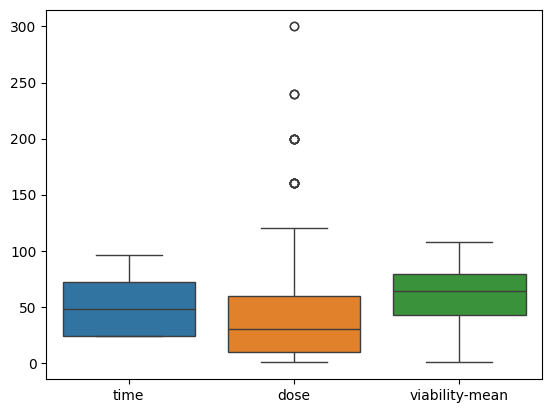

In [ ]:
sns.boxplot(df)

In [ ]:
#df['dose-out'] = df['dose']
#df['dose-out'][df['dose-out']==160] = 130
#df['dose-out'][df['dose-out']==200] = 140
#df['dose-out'][df['dose-out']==240] = 150
#df['dose-out'][df['dose-out']==300] = 160

<Axes: >

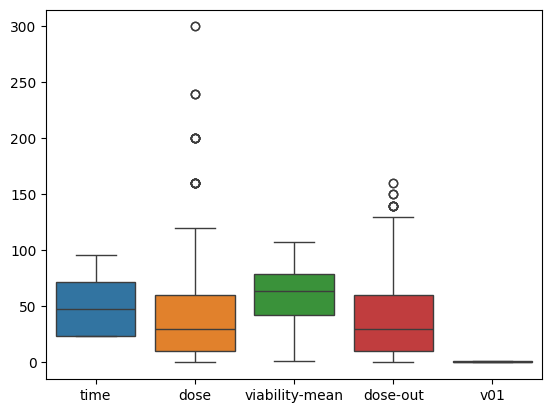

In [ ]:
sns.boxplot(df)

## Correlation


In [ ]:
df['flavone'].unique()

array(['Acacetin', 'Luteolin', 'Chrysin', 'Apigenin', 'Baicalein',
       'Cirsiliol', 'Eupatilin', 'Oroxylin A'], dtype=object)

correlation for any flavone!

<Axes: >

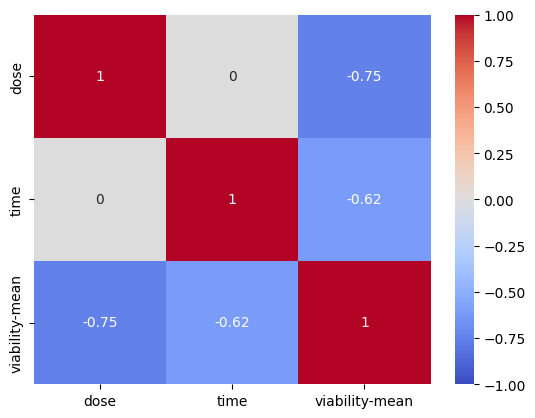

In [ ]:
matrix11 = df.loc[df['flavone']=='Acacetin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix11, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

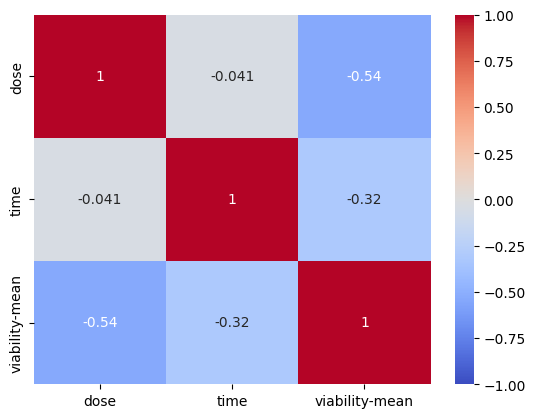

In [ ]:
# dose-out is better

matrix12 = df.loc[df['flavone']=='Apigenin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix12, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

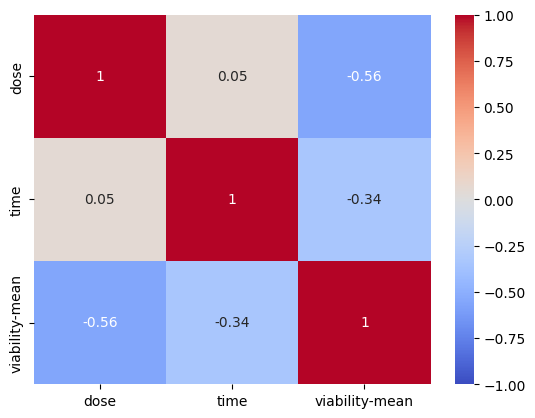

In [ ]:
matrix13 = df.loc[df['flavone']=='Baicalein', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix13, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

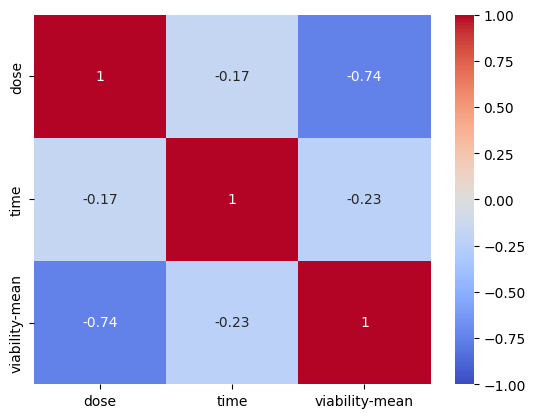

In [ ]:
matrix21 = df.loc[df['flavone']=='Chrysin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix21, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

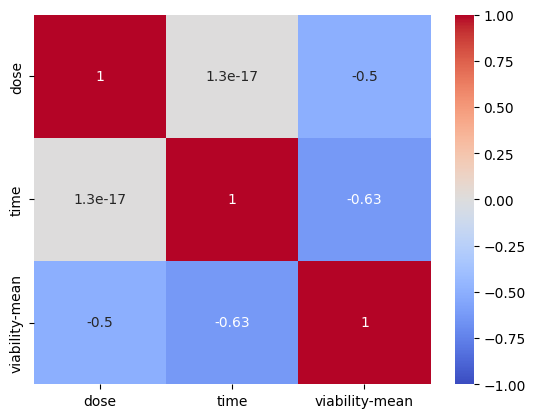

In [ ]:
matrix22 = df.loc[df['flavone']=='Cirsiliol', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix22, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

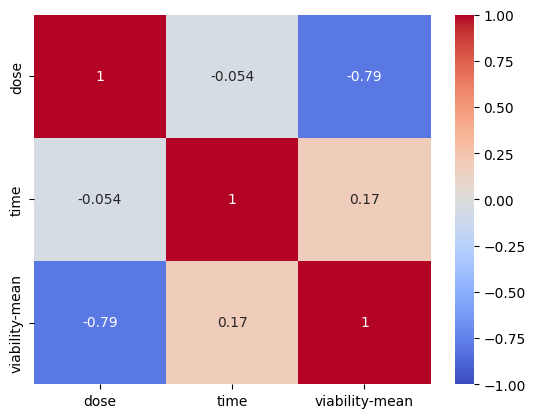

In [ ]:
matrix23 = df.loc[df['flavone']=='Eupatilin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix23, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

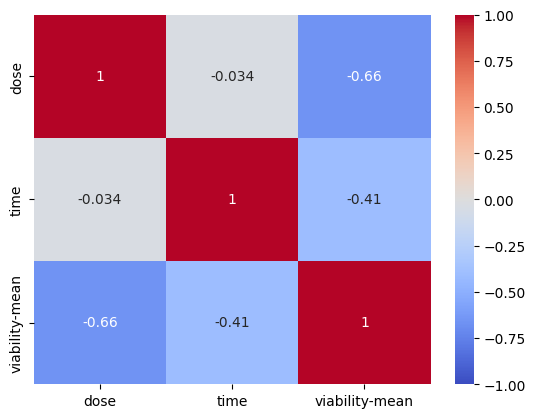

In [ ]:
# dose-out is better

matrix31 = df.loc[df['flavone']=='Luteolin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix31, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

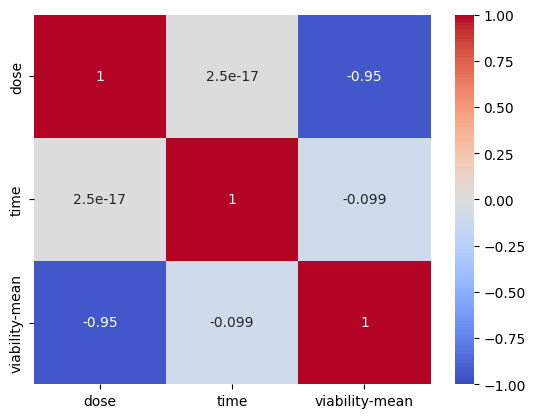

In [ ]:
matrix32 = df.loc[df['flavone']=='Oroxylin A', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix32, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [ ]:
#Correlation

df.loc[:, ['dose', 'time', 'viability-mean']].corr()

,dose,time,viability-mean
dose,1.000000,-0.080298,-0.576411
time,-0.080298,1.000000,-0.314265
viability-mean,-0.576411,-0.314265,1.000000


In [ ]:
#Correlation

df.loc[:, ['dose-out', 'time', 'viability-mean']].corr()

,dose-out,time,viability-mean
dose-out,1.000000,-0.089594,-0.622750
time,-0.089594,1.000000,-0.314265
viability-mean,-0.622750,-0.314265,1.000000


<Axes: >

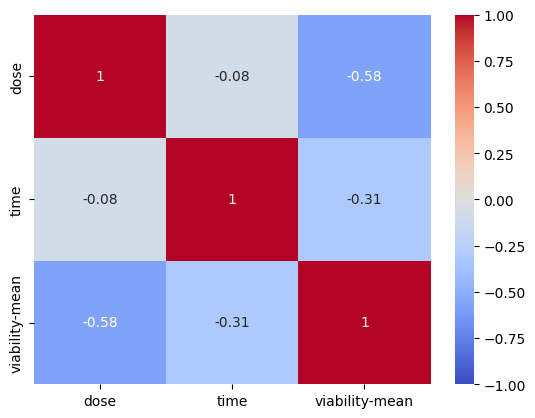

In [ ]:
matrix = df.loc[:, ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'All Flavones')

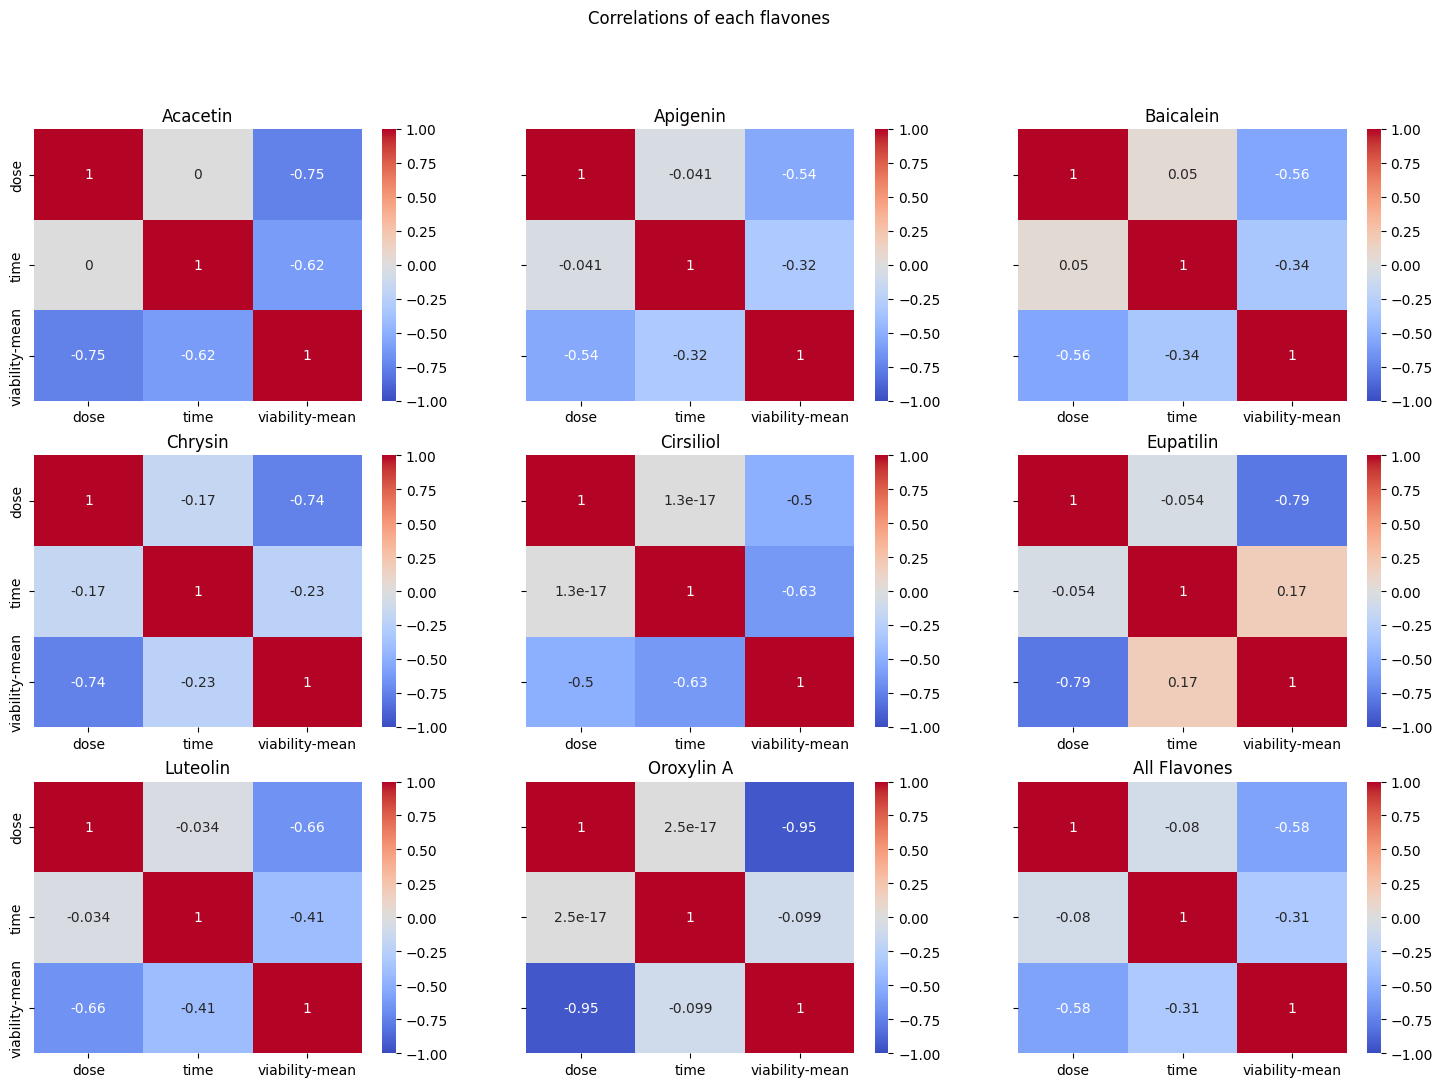

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
fig.suptitle('Correlations of each flavones')

sns.heatmap(matrix11, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[0, 0])
axes[0, 0].set_title('Acacetin')

sns.heatmap(matrix12, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[0, 1])
axes[0, 1].set_title('Apigenin')

sns.heatmap(matrix13, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[0, 2])
axes[0, 2].set_title('Baicalein')

sns.heatmap(matrix21, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[1, 0])
axes[1, 0].set_title('Chrysin')

sns.heatmap(matrix22, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[1, 1])
axes[1, 1].set_title('Cirsiliol')

sns.heatmap(matrix23, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[1, 2])
axes[1, 2].set_title('Eupatilin')

sns.heatmap(matrix31, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[2, 0])
axes[2, 0].set_title('Luteolin')

sns.heatmap(matrix32, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[2, 1])
axes[2, 1].set_title('Oroxylin A')

sns.heatmap(matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=axes[2, 2])
axes[2, 2].set_title('All Flavones')


In [ ]:
df_2.corr()

,flavone,cell line,time,dose,viability-mean
flavone,1.000000,-0.233911,-0.003697,0.166642,-0.156169
cell line,-0.233911,1.000000,0.037429,-0.199613,0.199859
time,-0.003697,0.037429,1.000000,-0.080298,-0.314265
dose,0.166642,-0.199613,-0.080298,1.000000,-0.576411
viability-mean,-0.156169,0.199859,-0.314265,-0.576411,1.000000


In [ ]:
df_encoded.corr()

,time,dose,viability-mean,flavone_Acacetin,flavone_Apigenin,flavone_Baicalein,flavone_Chrysin,flavone_Cirsiliol,flavone_Eupatilin,flavone_Luteolin,...,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 410,cell line_KYSE 450,cell line_KYSE 510,cell line_OE 33,cell line_TE 1,cell line_TE 10,cell line_TE 13,cell line_YES 2
time,1.000000,-0.080298,-0.314265,-0.007148,-0.082582,-0.029512,0.140093,-0.007148,0.043092,0.018113,...,-0.087313,0.106777,0.121256,0.101313,-0.020968,-0.017429,0.023534,-0.005005,-0.103336,0.121256
dose,-0.080298,1.000000,-0.576411,-0.018380,0.020373,-0.082402,-0.131482,-0.143795,-0.158465,0.212833,...,-0.041889,-0.011164,-0.059694,-0.106205,-0.086373,-0.050210,-0.049563,-0.012869,0.116741,-0.059694
viability-mean,-0.314265,-0.576411,1.000000,-0.024013,0.149897,0.035193,-0.003815,0.019215,0.277494,-0.364520,...,0.093786,-0.027863,0.023320,-0.040539,-0.125088,0.135957,0.139848,-0.014236,0.112209,0.029963
flavone_Acacetin,-0.007148,-0.018380,-0.024013,1.000000,-0.096883,-0.058203,-0.101517,-0.039735,-0.051991,-0.140952,...,-0.039735,-0.041977,-0.020648,-0.044124,-0.116553,-0.096883,0.214475,0.700186,-0.032231,-0.020648
flavone_Apigenin,-0.082582,0.020373,0.149897,-0.096883,1.000000,-0.141911,-0.247519,-0.096883,-0.126765,-0.343672,...,0.043956,0.085121,-0.050344,-0.107584,0.013262,0.340682,-0.190985,-0.067836,-0.078586,-0.050344
flavone_Baicalein,-0.029512,-0.082402,0.035193,-0.058203,-0.141911,1.000000,-0.148698,-0.058203,-0.076155,-0.206462,...,0.106443,-0.061487,-0.030245,-0.064631,0.263929,-0.141911,-0.114735,-0.040753,-0.047211,-0.030245
flavone_Chrysin,0.140093,-0.131482,-0.003815,-0.101517,-0.247519,-0.148698,1.000000,-0.101517,-0.132829,-0.360110,...,0.035409,0.022942,0.203396,0.011674,0.280583,0.072980,-0.200120,-0.071080,-0.082344,0.203396
flavone_Cirsiliol,-0.007148,-0.143795,0.019215,-0.039735,-0.096883,-0.058203,-0.101517,1.000000,-0.051991,-0.140952,...,-0.039735,-0.041977,-0.020648,0.428204,-0.116553,-0.096883,-0.078330,-0.027822,-0.032231,-0.020648
flavone_Eupatilin,0.043092,-0.158465,0.277494,-0.051991,-0.126765,-0.076155,-0.132829,-0.051991,1.000000,-0.184428,...,-0.051991,-0.054925,-0.027017,-0.057734,-0.152503,-0.126765,0.663745,-0.036403,-0.042172,-0.027017
flavone_Luteolin,0.018113,0.212833,-0.364520,-0.140952,-0.343672,-0.206462,-0.360110,-0.140952,-0.184428,1.000000,...,-0.046984,0.029781,-0.073245,0.014229,-0.165380,-0.068734,0.039694,-0.098693,-0.114332,-0.073245


## EFS

In [ ]:
#df_2
X = df_2[['flavone', 'cell line', 'time', 'dose', 'dose-out']]
y = df_2['viability-mean']

#df_2_scaled
X_scaled = df_2_scaled[['flavone', 'cell line', 'time', 'dose', 'dose-out']]
y_scaled = df_2_scaled['viability-mean']

#df_encoded
X_encoded = df_encoded.drop(['viability-mean', 'v01'], axis=1)
y_encoded = df_encoded['viability-mean']

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['viability-mean', 'v01'], axis=1)
y_encoded_scaled = df_encoded_scaled['viability-mean']


In [ ]:
knr = KNeighborsRegressor()
svr = SVR()
lir = LinearRegression()
rig = Ridge()
las = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

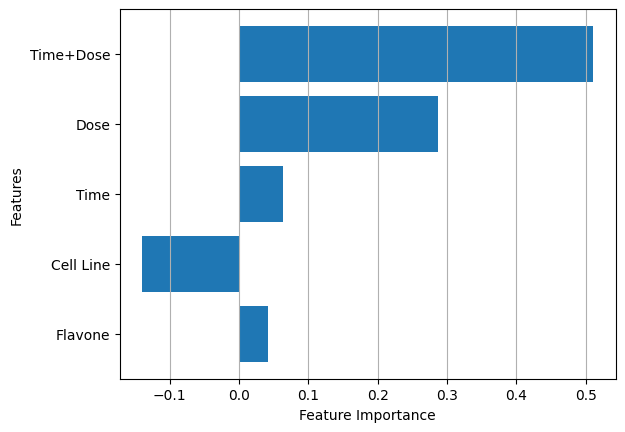

In [ ]:
y_for_bar=['Flavone', 'Cell Line', 'Time', 'Dose', 'Time+Dose']

# getting values against each value of y
x_for_bar=[0.04154853978748563, -0.1394451203933756, 0.06383556586222765, 0.2873895464922075, 0.5109092885255413]
plt.barh(y_for_bar, x_for_bar)

# setting label of y-axis
plt.ylabel("Features")

# setting label of x-axis
plt.xlabel("Feature Importance")
#plt.title("Horizontal bar graph")
plt.grid(axis='x')
plt.show()

In [ ]:
efs = EFS(dtr, min_features=1, max_features=2, scoring='r2', print_progress=True, cv=5)
efs = efs.fit(X, y)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
efs.subsets_

Features: 15/15

Best accuracy score:  0.5109092885255413
Best subset (indices): (2, 3)
Best subset (corresponding names): ('time', 'dose')


{0: {'feature_idx': (0,),
  'cv_scores': array([ 0.04237827,  0.15334279, -0.08804498,  0.31200937, -0.21194276]),
  'avg_score': 0.04154853978748563,
  'feature_names': ('flavone',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.06688188,  0.07590639, -0.40684499, -0.01487666, -0.28452847]),
  'avg_score': -0.1394451203933756,
  'feature_names': ('cell line',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([ 0.13859511,  0.18399908, -0.16079431, -0.03162827,  0.18900622]),
  'avg_score': 0.06383556586222765,
  'feature_names': ('time',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.27877466, 0.23780708, 0.11988833, 0.50279356, 0.29768411]),
  'avg_score': 0.2873895464922075,
  'feature_names': ('dose',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.27877466, 0.23780708, 0.11988833, 0.50279356, 0.29768411]),
  'avg_score': 0.2873895464922075,
  'feature_names': ('dose-out',)},
 5: {'feature_idx': (0, 1),
  'cv_scores': array([ 0.11450673,  0.33485119, -0.31803454,  

In [ ]:
efs = EFS(dtr, min_features=1, max_features=2, scoring='r2', print_progress=True, cv=5)
efs = efs.fit(X_scaled, y_scaled)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
efs.subsets_

Features: 15/15

Best accuracy score:  0.5110620886452648
Best subset (indices): (2, 3)
Best subset (corresponding names): ('time', 'dose')


{0: {'feature_idx': (0,),
  'cv_scores': array([ 0.04237827,  0.15334279, -0.31036208,  0.31200937, -0.21194276]),
  'avg_score': -0.0029148813625034407,
  'feature_names': ('flavone',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.06688188,  0.07590639, -0.40684499, -0.01487666, -0.28452847]),
  'avg_score': -0.1394451203933757,
  'feature_names': ('cell line',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([ 0.13859511,  0.18399908, -0.16079431, -0.03162827,  0.18900622]),
  'avg_score': 0.06383556586222769,
  'feature_names': ('time',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.27877466, 0.23780708, 0.11988833, 0.50279356, 0.29768411]),
  'avg_score': 0.28738954649220744,
  'feature_names': ('dose',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.27877466, 0.23780708, 0.11988833, 0.50279356, 0.29768411]),
  'avg_score': 0.28738954649220744,
  'feature_names': ('dose-out',)},
 5: {'feature_idx': (0, 1),
  'cv_scores': array([ 0.09403917,  0.33485119, -0.326304

## Data Visualization

### Boxplot

<Axes: >

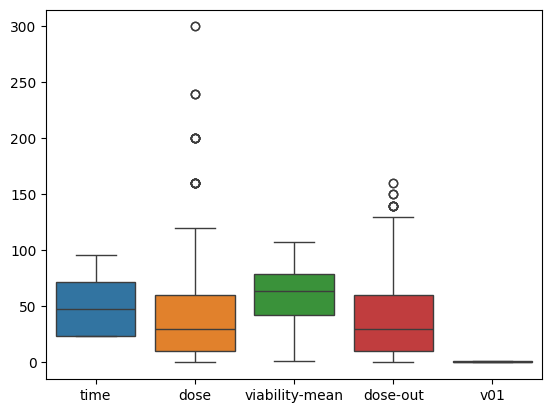

In [ ]:
sns.boxplot(df)

### Donut Chart

In [ ]:
flavo_count = df['flavone'].value_counts()
cell_line_count = df['cell line'].value_counts()


In [ ]:
flavone_labels = ["Luteolin", "Chrysin", "Apigenin", "Baicalein", "Eupatilin", "Oroxylin A", "Acacetin", "Cirsiliol"]
cell_line_labels = ["KYSE 510", "OE 33", "EC 109", "TE 1", "KYSE 450", "KYSE 30", "KYSE 150", "EC 9706", 'TE 13', 'TE 10', "KYSE 140", "EC 1", "KYSE 410", "YES 2"]


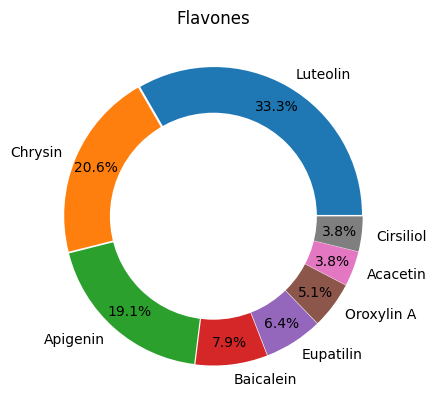

In [ ]:
# explosion
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Pie Chart
plt.pie(flavo_count, labels=flavone_labels, autopct='%1.1f%%', pctdistance=0.85, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Flavones')

# Displaying Chart
plt.show()


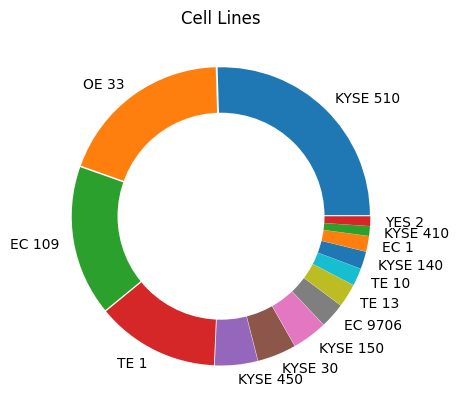

In [ ]:
# explosion
explode = ((0.01, 0.01)*7)

# Pie Chart
plt.pie(cell_line_count, labels=cell_line_labels, pctdistance=0.85, explode=explode) #autopct='%1.1f%%'

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Cell Lines')

# Displaying Chart
plt.show()


### 3D Scatter Plot

In [ ]:
aca = df['flavone']=='Acacetin'
api = df['flavone']=='Apigenin'
bai = df['flavone']=='Baicalein'
chr = df['flavone']=='Chrysin'
cir = df['flavone']=='Cirsiliol'
eup = df['flavone']=='Eupatilin'
lut = df['flavone']=='Luteolin'
oro = df['flavone']=='Oroxylin A'

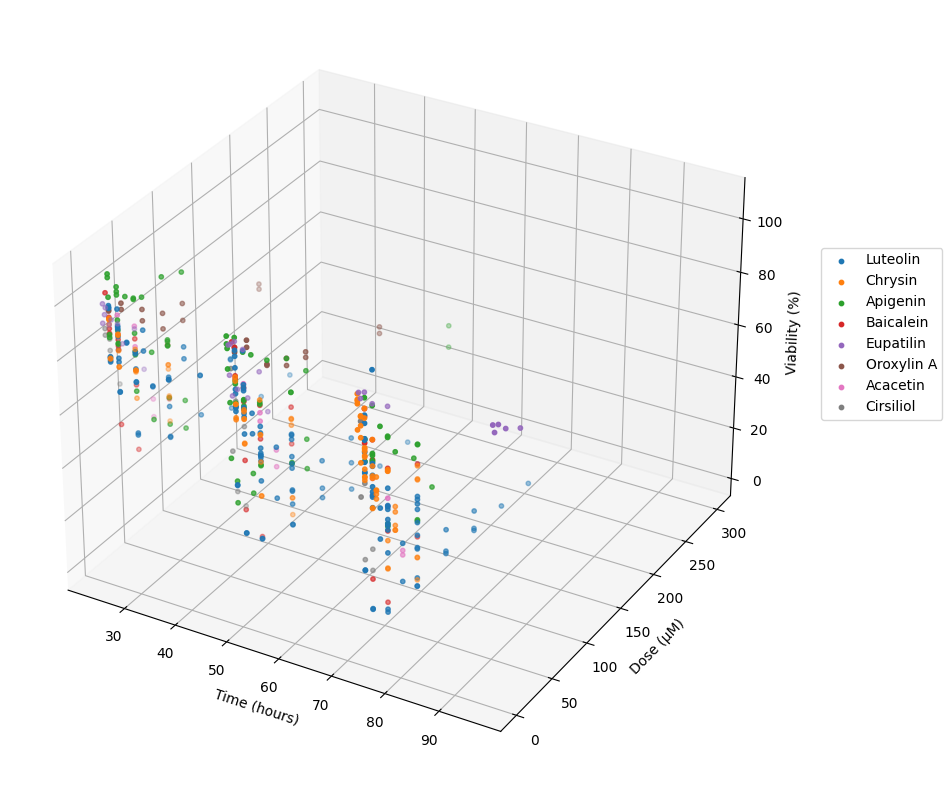

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10,10))
ax3D = fig.add_subplot(111, projection='3d')

p3d = ax3D.scatter(df['time'][lut], df['dose'][lut], df['viability-mean'][lut], s=10)#, c=df_2['flavone'])
p3d = ax3D.scatter(df['time'][chr], df['dose'][chr], df['viability-mean'][chr], s=10)
p3d = ax3D.scatter(df['time'][api], df['dose'][api], df['viability-mean'][api], s=10)
p3d = ax3D.scatter(df['time'][bai], df['dose'][bai], df['viability-mean'][bai], s=10)
p3d = ax3D.scatter(df['time'][eup], df['dose'][eup], df['viability-mean'][eup], s=10)
p3d = ax3D.scatter(df['time'][oro], df['dose'][oro], df['viability-mean'][oro], s=10)
p3d = ax3D.scatter(df['time'][aca], df['dose'][aca], df['viability-mean'][aca], s=10)
p3d = ax3D.scatter(df['time'][cir], df['dose'][cir], df['viability-mean'][cir], s=10)

ax3D.set_xlabel('Time (hours)')
ax3D.set_ylabel('Dose (μM)')
ax3D.set_zlabel('Viability (%)')

ax3D.legend(flavone_labels, bbox_to_anchor=(1.22, 0.7))

plt.show()

### 2D Scatter Plots

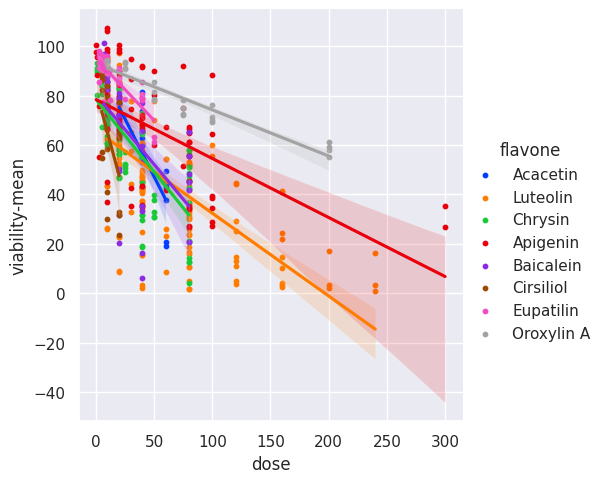

In [ ]:
sns.set(style="darkgrid") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavone", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


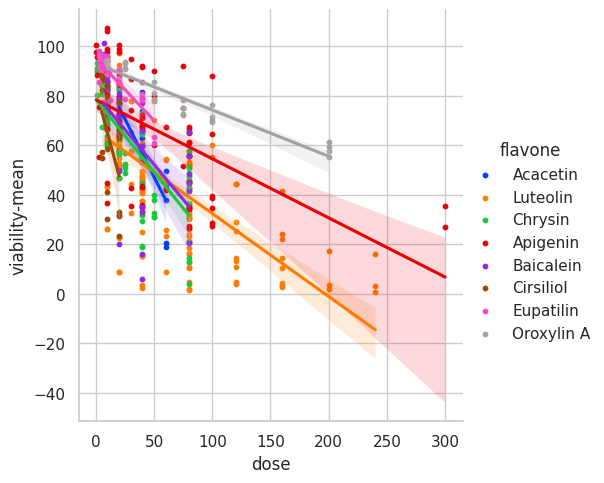

In [ ]:
sns.set(style="whitegrid") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavone", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


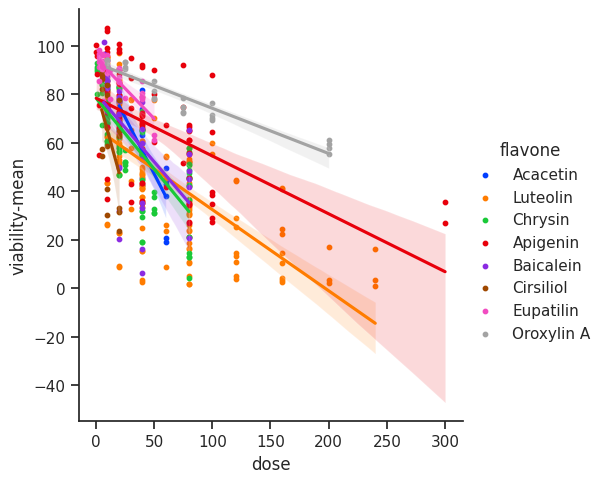

In [ ]:
sns.set(style="ticks") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavone", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


## K Fold


In [ ]:
#df_2
X = df_2[['time', 'dose']]
Xo = df_2[['time', 'dose-out']]

#df_2_scaled
X_scaled = df_2_scaled[['time', 'dose']]
Xo_scaled = df_2_scaled[['time', 'dose-out']]

#df_encoded
X_encoded = df_encoded.drop(['dose-out', 'viability-mean', 'v01'], axis=1)
Xo_encoded = df_encoded.drop(['dose', 'viability-mean', 'v01'], axis=1)

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['dose-out', 'viability-mean', 'v01'], axis=1)
Xo_encoded_scaled = df_encoded_scaled.drop(['dose', 'viability-mean', 'v01'], axis=1)

list_X = [X, Xo, X_scaled, Xo_scaled, X_encoded, Xo_encoded, X_encoded_scaled, Xo_encoded_scaled]

y01 = df['v01']

In [ ]:
#initialize

knc = KNeighborsClassifier()
svc = SVC()
lor = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(knc, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean())

0.7991312056737588
0.8020833333333334
0.8014140070921986
0.8020966312056738
0.8114406028368795
0.813125
0.7746941489361703
0.7965824468085106


In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(svc, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean())

0.8097650709219859
0.8144326241134753
0.8061347517730496
0.8101418439716312
0.8023005319148936
0.8033599290780142
0.7672872340425532
0.8356959219858157


In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(lor, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean(),'\n\n\n\n\n\n\n\n\n\n\n\n\n')

0.7914804964539008 













0.798488475177305 













0.7458111702127659 













0.7757668439716312 















/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8418173758865247 















/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8541533687943262 













0.8254831560283689 













0.8395035460992908 















In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(dtc, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean())

0.8188829787234043
0.8188829787234043
0.8188829787234043
0.8188829787234043
0.9040691489361702
0.902145390070922
0.9030053191489362
0.9027925531914894


In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(rfc, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean())

0.8110328014184397
0.8097562056737588
0.8097517730496454
0.8071941489361703
0.9151063829787235
0.9167863475177305
0.9157358156028369
0.9212455673758866


## Hyperparameter Tuning


In [ ]:
#df['v01'] = 1
#df['v01'][df['viability-mean']>50] = 0

In [ ]:
#df_2
X = df_2[['time', 'dose']]
Xo = df_2[['time', 'dose-out']]

#df_2_scaled
X_scaled = df_2_scaled[['time', 'dose']]
Xo_scaled = df_2_scaled[['time', 'dose-out']]

#df_encoded
X_encoded = df_encoded.drop(['dose-out', 'viability-mean', 'v01'], axis=1)
Xo_encoded = df_encoded.drop(['dose', 'viability-mean', 'v01'], axis=1)

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['dose-out', 'viability-mean', 'v01'], axis=1)
Xo_encoded_scaled = df_encoded_scaled.drop(['dose', 'viability-mean', 'v01'], axis=1)

list_X = [X, Xo, X_scaled, Xo_scaled, X_encoded, Xo_encoded, X_encoded_scaled, Xo_encoded_scaled]

y01 = df['v01']

In [ ]:
#initialize

knc = KNeighborsClassifier()
svc = SVC()
lor = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


### K-Nearest Neighbors (KNN)

In [ ]:
#help(knc)

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X_encoded, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

CPU times: user 33.4 s, sys: 202 ms, total: 33.6 s
Wall time: 18.5 s
{'metric': 'euclidean', 'n_neighbors': 77, 'weights': 'distance'}
0.874535274356103


[0.78947368 0.84477044 0.84477044 0.85966405 0.85964166 0.86817469
 0.86604703 0.86179171 0.86394177 0.86181411 0.87243001 0.87030235
 0.87030235 0.87030235 0.87243001 0.87030235 0.87030235 0.87030235
 0.87240761 0.87240761 0.87240761 0.87240761 0.87240761 0.87027996
 0.8681523  0.87027996 0.87027996 0.87027996 0.87027996 0.87027996
 0.87027996 0.87027996 0.87027996 0.87027996 0.87027996 0.87027996
 0.87027996 0.87027996 0.87027996 0.87027996 0.87027996 0.87027996
 0.87027996 0.87027996 0.8681523  0.86602464 0.8681523  0.87027996
 0.86602464]


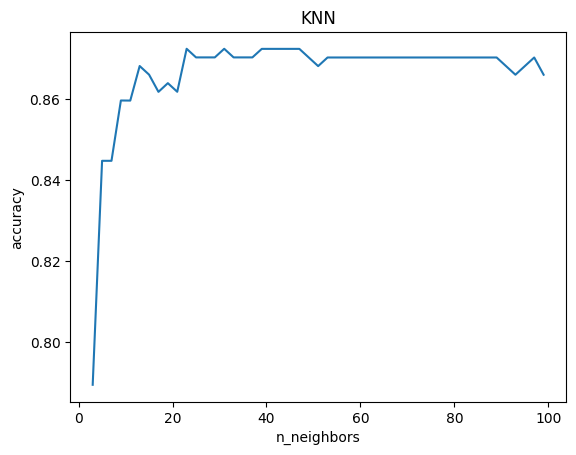

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['distance'],
            'metric': ['manhattan']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X_encoded, y01)
print(gs_kn.cv_results_['mean_test_score'])

plt.plot(range(3, 100, 2), gs_kn.cv_results_['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN')

plt.show()

CPU times: user 1.19 s, sys: 4.79 ms, total: 1.2 s
Wall time: 630 ms
{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
0.8724300111982084


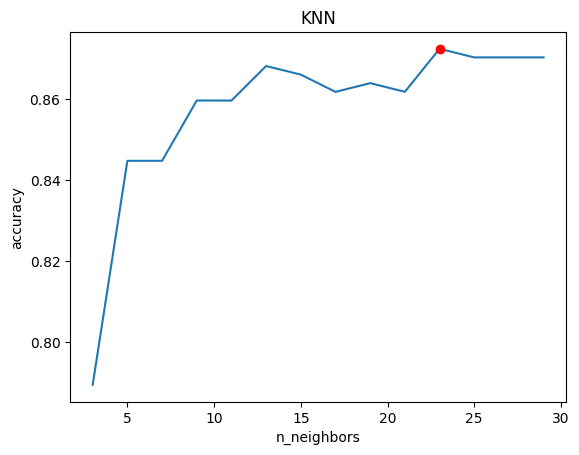

In [ ]:
param_kn = {'n_neighbors': range(3, 30, 2),
            'weights': ['distance'],
            'metric': ['manhattan']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X_encoded, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

plt.plot(range(3, 30, 2), gs_kn.cv_results_['mean_test_score'])

plt.plot(23, 0.8724300111982084, 'ro')

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN')

plt.show()

In [ ]:
param_kn = {'n_neighbors': [23],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X_encoded, y01)
print(gs_kn.cv_results_['mean_test_score'][4:6].mean())

print(gs_kn.cv_results_['params'])

0.8353863381858901
[{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'distance'}, {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}, {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}, {'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'uniform'}, {'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'distance'}]


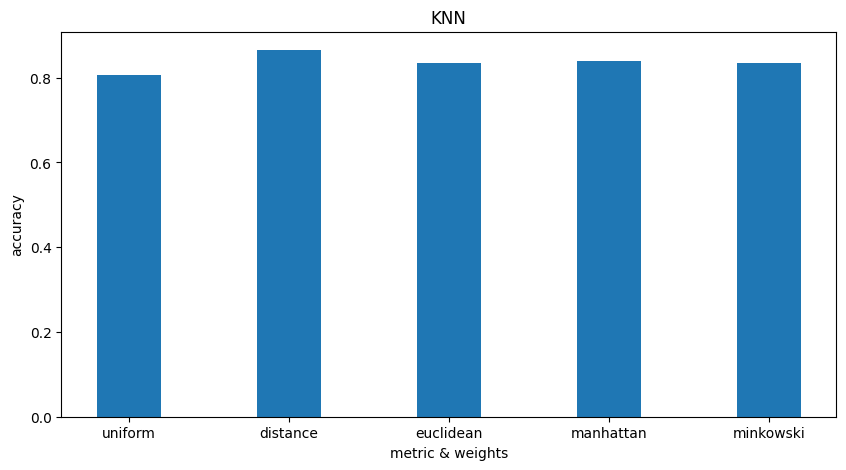

In [ ]:
knn_bar = {'uniform':0.8075401269130271 , 'distance':0.8653527435610302, 'euclidean':0.8353863381858901, 'manhattan':0.8385666293393057, 'minkowski':0.8353863381858901}
courses = list(knn_bar.keys())
values = list(knn_bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("metric & weights")
plt.ylabel("accuracy")
plt.title('KNN')
plt.show()

### Support Vector Machine (SVM)

In [ ]:
#help(svc)

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': [2**_ for _ in range(-15,10)]}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

CPU times: user 1min 44s, sys: 113 ms, total: 1min 44s
Wall time: 1min 45s
{'C': 0.03125, 'kernel': 'linear'}
0.8047256438969764


[0.76651736 0.76868981 0.77290034 0.77290034 0.77290034 0.77290034
 0.77290034 0.775028   0.78989922 0.7962598  0.80472564 0.80049272
 0.80465845 0.80038074 0.76853303 0.76642777 0.75578947 0.75791713
 0.75153415 0.75153415 0.74940649 0.75578947 0.75368421 0.75368421
 0.75578947]


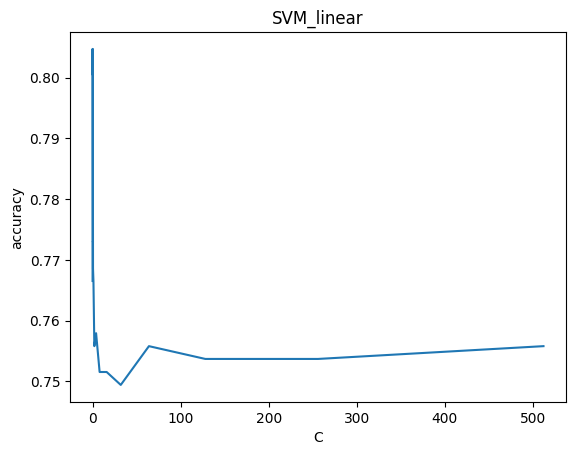

In [ ]:
print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,10)], gs_sv_l.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

CPU times: user 1.24 s, sys: 979 µs, total: 1.24 s
Wall time: 1.24 s
{'C': 0.03125, 'kernel': 'linear'}
0.8047256438969764


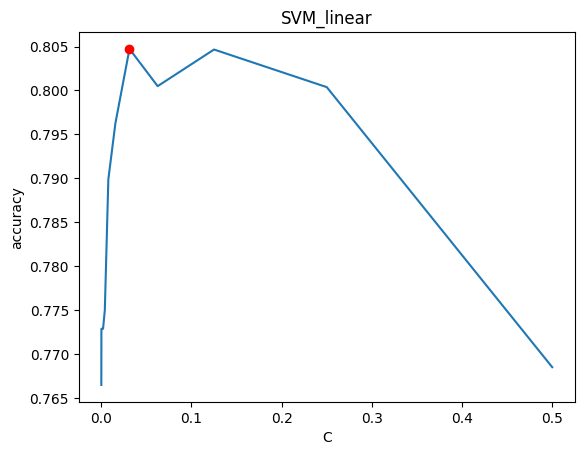

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': [2**_ for _ in range(-15,0)]}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

plt.plot([2**_ for _ in range(-15,0)], gs_sv_l.cv_results_['mean_test_score'])
plt.plot(0.03125, 0.8047256438969764, 'ro')

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

CPU times: user 749 ms, sys: 4.81 ms, total: 753 ms
Wall time: 762 ms
{'C': 0.03, 'kernel': 'linear'}
0.8047256438969764


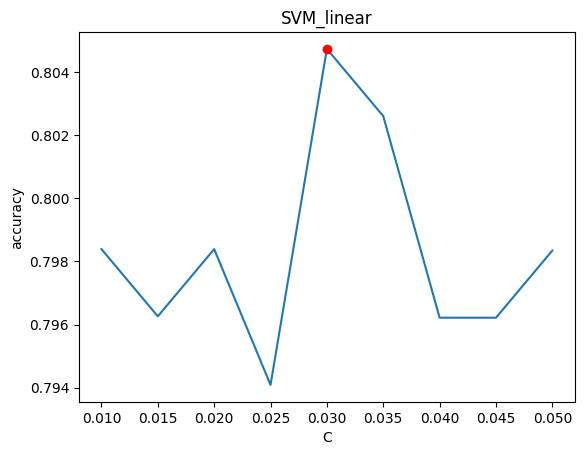

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': (0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050)}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

plt.plot((0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050), gs_sv_l.cv_results_['mean_test_score'])
plt.plot(0.03, 0.8047256438969764, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

In [ ]:
gamma_rbf = [2**_ for _ in range(-15,10)]
gamma_rbf.insert(0,0)

param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': gamma_rbf}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

CPU times: user 50.1 s, sys: 101 ms, total: 50.2 s
Wall time: 52 s
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8321612541993281


CPU times: user 2.66 s, sys: 11.8 ms, total: 2.67 s
Wall time: 2.71 s
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8321612541993281
[0.79838746 0.7962598  0.79838746 0.79408735 0.80472564 0.80259798
 0.79621501 0.79621501 0.79834267]


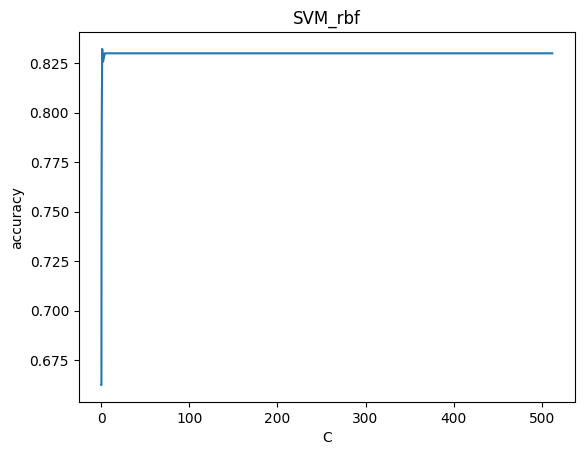

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': [0.5]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,10)], gs_sv_r.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 1.47 s, sys: 2.96 ms, total: 1.47 s
Wall time: 1.47 s
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8321612541993281
[0.79838746 0.7962598  0.79838746 0.79408735 0.80472564 0.80259798
 0.79621501 0.79621501 0.79834267]


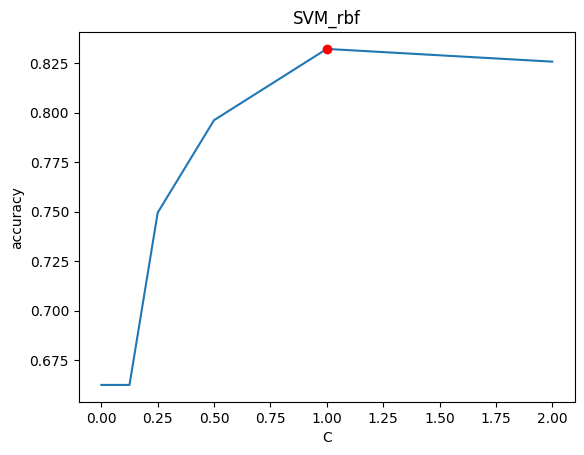

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,2)],
            'gamma': [0.5]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,2)], gs_sv_r.cv_results_['mean_test_score'])
plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 1.97 s, sys: 1.96 ms, total: 1.98 s
Wall time: 1.99 s
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8321612541993281
[0.79838746 0.7962598  0.79838746 0.79408735 0.80472564 0.80259798
 0.79621501 0.79621501 0.79834267]


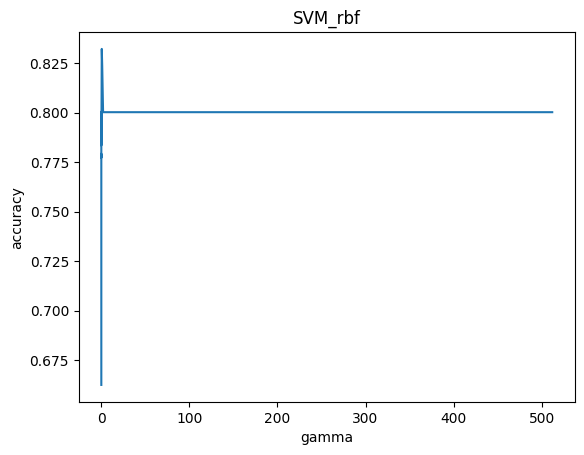

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [1],
            'gamma': gamma_rbf}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot(gamma_rbf, gs_sv_r.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 1.85 s, sys: 4.82 ms, total: 1.85 s
Wall time: 1.91 s
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.8321612541993281
[0.79838746 0.7962598  0.79838746 0.79408735 0.80472564 0.80259798
 0.79621501 0.79621501 0.79834267]


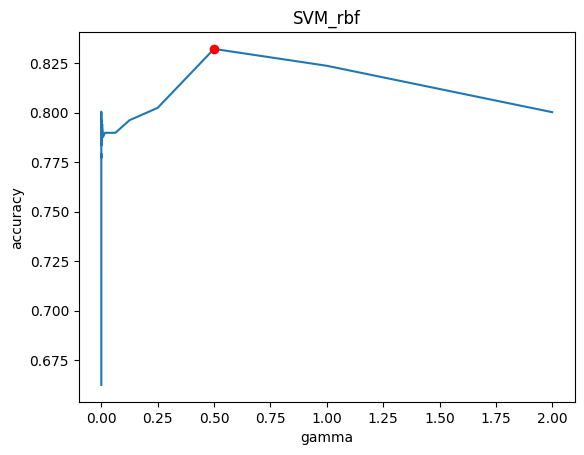

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [1],
            'gamma': gamma_rbf[0:18]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot(gamma_rbf[0:18], gs_sv_r.cv_results_['mean_test_score'])
plt.plot(0.5, 0.8321612541993281, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

In [ ]:
gamma_poly = [2**_ for _ in range(-15,10)]
gamma_poly.insert(0,0)


param_sv_p = {'kernel': ['poly'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': gamma_poly,
            'degree': [2],
            'max_iter': [10000]}
gs_sv_p = GridSearchCV(svc, param_sv_p, cv=5, scoring='accuracy')
%time gs_sv_p.fit(X_encoded, y01)
print(gs_sv_p.best_params_)
print(gs_sv_p.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

CPU times: user 1min 8s, sys: 513 ms, total: 1min 9s
Wall time: 1min 10s
{'C': 3.0517578125e-05, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'max_iter': 10000}
0.8216573348264278


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

In [ ]:
{'C': 0.5, 'degree': 2, 'gamma': 2, 'kernel': 'poly', 'max_iter': 500000}
0.8238297872340427

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Con

CPU times: user 2.94 s, sys: 26.9 ms, total: 2.97 s
Wall time: 2.94 s
{'C': 3.0517578125e-05, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'max_iter': 10000}
0.8216573348264278


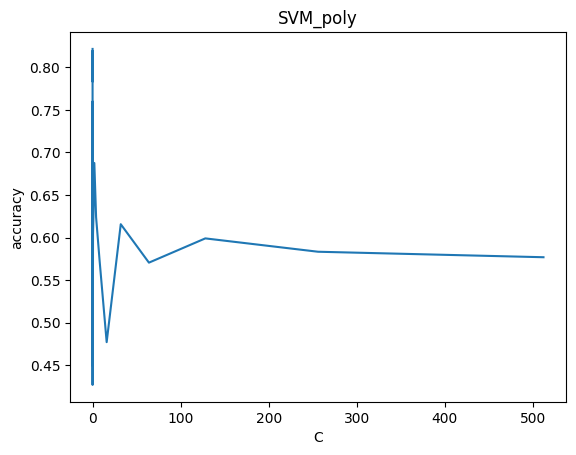

In [ ]:
param_sv_p = {'kernel': ['poly'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': [1],
            'degree': [2],
            'max_iter': [10000]}
gs_sv_p = GridSearchCV(svc, param_sv_p, cv=5, scoring='accuracy')
%time gs_sv_p.fit(X_encoded, y01)
print(gs_sv_p.best_params_)
print(gs_sv_p.best_score_)

plt.plot([2**_ for _ in range(-15,10)], gs_sv_p.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_poly')

plt.show()

In [ ]:
gs_sv_p.cv_results_['mean_test_score']

array([0.82165733, 0.78322508, 0.81950728, 0.67717805, 0.70470325,
       0.70096305, 0.42698768, 0.69614782, 0.75991041, 0.66519597,
       0.51323628, 0.49892497, 0.50568869, 0.44945129, 0.60468085,
       0.6262262 , 0.68765957, 0.62400896, 0.57272116, 0.47722284,
       0.61576708, 0.5706159 , 0.59910414, 0.58342665, 0.57697648])

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400000).

CPU times: user 53.5 s, sys: 111 ms, total: 53.6 s
Wall time: 58.4 s
{'C': 8, 'degree': 2, 'gamma': 2, 'kernel': 'poly', 'max_iter': 400000}
0.8195744680851066


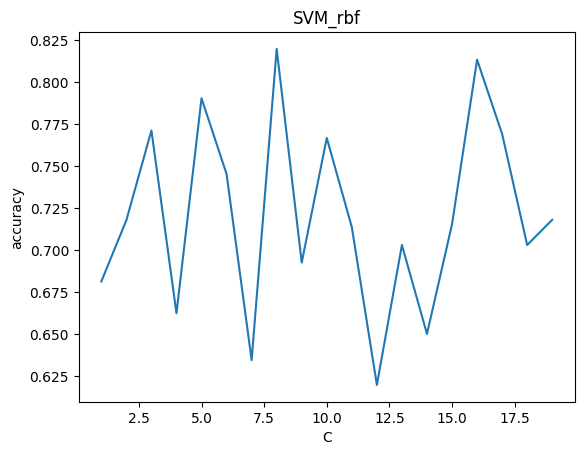

In [ ]:
param_sv_p = {'kernel': ['poly'],
            'C': range(1,20),
            'gamma': [2],
            'degree': [2],
            'max_iter': [400000]}
gs_sv_p = GridSearchCV(svc, param_sv_p, cv=5, scoring='accuracy')
%time gs_sv_p.fit(X_encoded, y01)
print(gs_sv_p.best_params_)
print(gs_sv_p.best_score_)

plt.plot(range(1,20), gs_sv_p.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

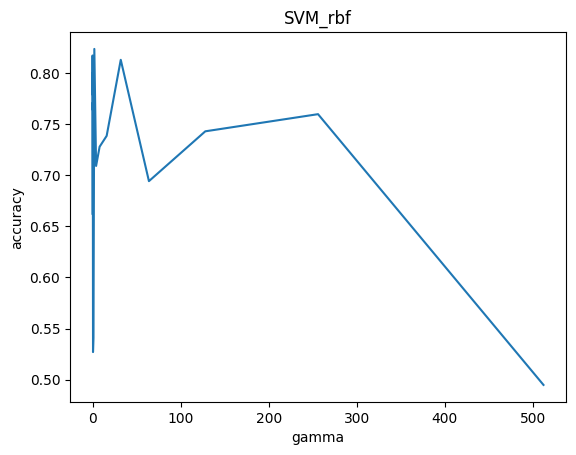

In [ ]:
plt.plot(gamma_poly, gs_sv_p.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_poly')

plt.show()

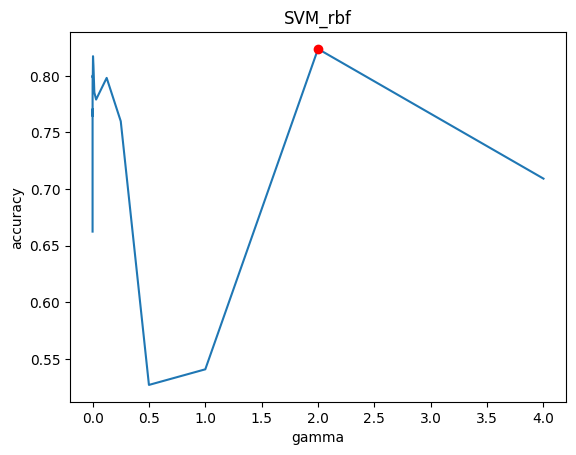

In [ ]:
plt.plot(gamma_poly[:19], gs_sv_p.cv_results_['mean_test_score'][:19])
plt.plot(2, 0.8238297872340427, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_poly')

plt.show()

### Logistic Regression (LOR)

In [ ]:
# solver:
# |         - 'lbfgs'           -   ['l2', None]
# |         - 'liblinear'       -   ['l1', 'l2']
# |         - 'newton-cg'       -   ['l2', None]
# |         - 'newton-cholesky' -   ['l2', None]
# |         - 'sag'             -   ['l2', None]
# |         - 'saga'            -   ['elasticnet', 'l1', 'l2', None]
# |
#help(lor)

In [ ]:
param_lo = {'penalty': ['l1', 'l2'],#, 'elasticnet', None],
            'C': [2**_ for _ in range(-15,10)],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X_encoded, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 1.96 s, sys: 5.03 ms, total: 1.97 s
Wall time: 1.96 s
{'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
0.7877043673012317


[0.66241881 0.66241881 0.66241881 0.66241881 0.66241881 0.64967525
 0.65406495 0.64980963 0.64980963 0.66044793 0.66895857 0.75384099
 0.77921613 0.78770437 0.77702128 0.76638298 0.75787234 0.74931691
 0.75352744 0.75139978 0.75139978 0.74714446 0.75139978 0.71531915
 0.70257559]


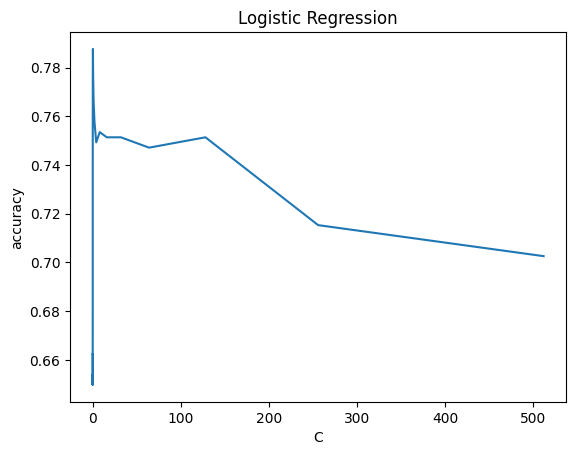

In [ ]:
param_lo = {'C': [2**_ for _ in range(-15,10)],
            'penalty': ['l1'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,10)], gs_lo.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Logistic Regression')

plt.show()

[0.66241881 0.66241881 0.66241881 0.66241881 0.66241881 0.64967525
 0.65406495 0.64980963 0.64980963 0.66044793 0.66895857 0.75384099
 0.77921613 0.78770437 0.77702128]


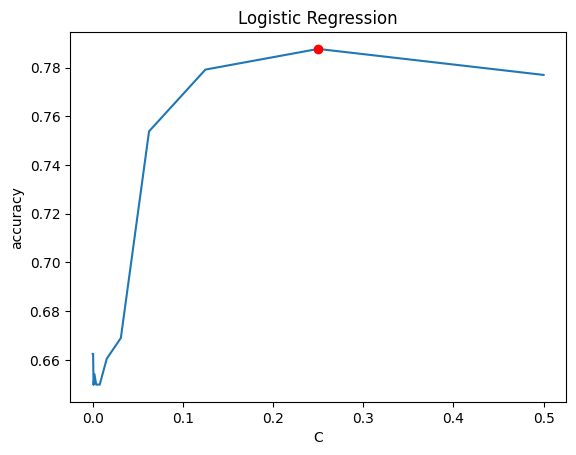

In [ ]:
param_lo = {'C': [2**_ for _ in range(-15,0)],
            'penalty': ['l1'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,0)], gs_lo.cv_results_['mean_test_score'])
plt.plot(0.25, 0.7877043673012317, 'ro')

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Logistic Regression')

plt.show()

In [ ]:
param_lo = {'C': [0.25],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

print(gs_lo.cv_results_['params'])

[0.78770437 0.74940649]
[{'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}, {'C': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}]


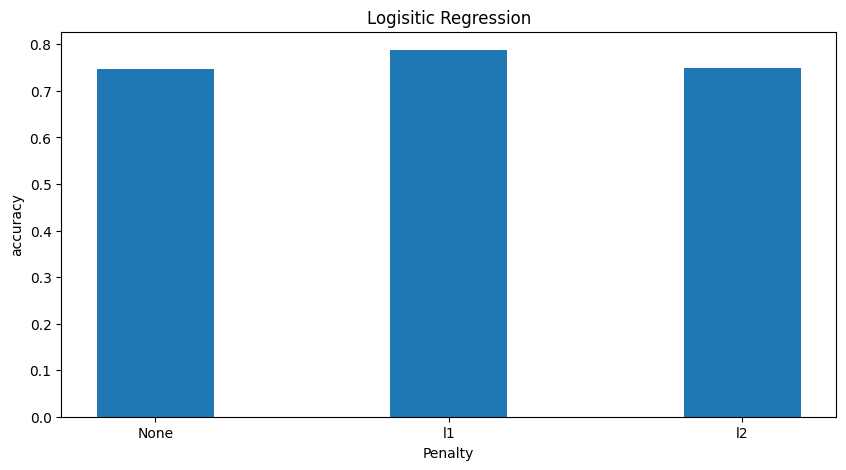

In [ ]:
lor_bar = {'None':0.7472564, 'l1':0.78770437  , 'l2':0.74940649}
courses = list(lor_bar.keys())
values = list(lor_bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("Penalty")
plt.ylabel("accuracy")
plt.title('Logisitic Regression')
plt.show()

In [ ]:
param_lo = {'C':[0.25],
            'penalty': [None],
            'solver': ['lbfgs']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X_encoded, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 158 ms, sys: 23.9 ms, total: 182 ms
Wall time: 181 ms
{'C': 0.25, 'penalty': None, 'solver': 'lbfgs'}
0.7472564389697649


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

### Decision Tree (DT)

In [ ]:
#help(dtc)

In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X_encoded, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)


CPU times: user 12 s, sys: 53 ms, total: 12 s
Wall time: 12.1 s
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}
0.8575139977603584


In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': [15],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X_encoded, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)
print(gs_dt.cv_results_['params'])
print('gini: ', gs_dt.cv_results_['mean_test_score'][0:2].mean())
print('entropy: ', gs_dt.cv_results_['mean_test_score'][2:4].mean())
print('random: ', np.array([0.83428891, 0.83213886]).mean())
print('best: ', np.array([0.83204927, 0.857514]).mean())

CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 124 ms
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}
0.8575139977603584
[{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}]
gini:  0.8331690929451288
entropy:  0.8448264277715565
random:  0.833213885
best:  0.8447816349999999


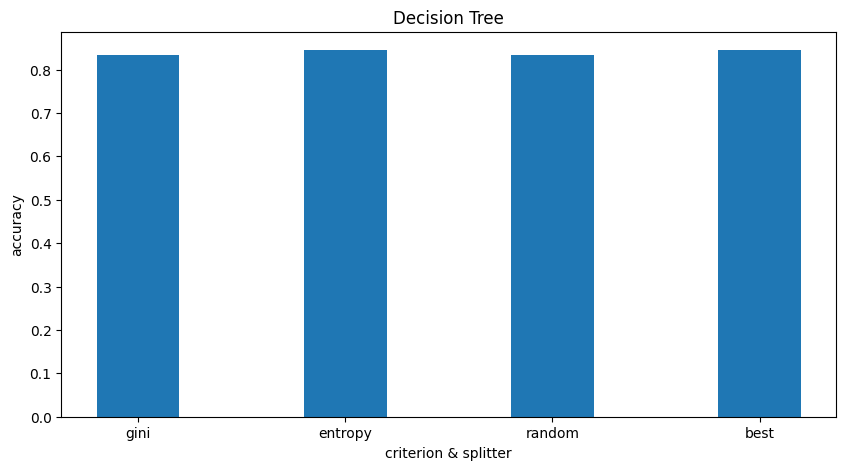

In [ ]:
dt_bar = {'gini':0.8331690929451288 , 'entropy':0.8448264277715565, 'random':0.833213885, 'best':0.8447816349999999}
courses = list(dt_bar.keys())
values = list(dt_bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("criterion & splitter")
plt.ylabel("accuracy")
plt.title('Decision Tree')
plt.show()

CPU times: user 2.76 s, sys: 6.31 ms, total: 2.76 s
Wall time: 2.77 s
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'random'}
0.8406270996640538


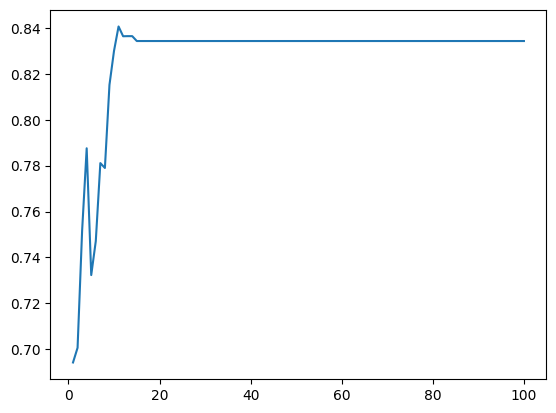

In [ ]:
param_dt_r = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt_r = GridSearchCV(dtc, param_dt_r, cv = 5, scoring = "accuracy")
%time gs_dt_r.fit(X_encoded, y01)
print(gs_dt_r.best_params_)
print(gs_dt_r.best_score_)

plt.plot(range(1, 101), gs_dt_r.cv_results_['mean_test_score'])


CPU times: user 3.34 s, sys: 8.59 ms, total: 3.35 s
Wall time: 3.4 s
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'random'}
0.8363941769316909


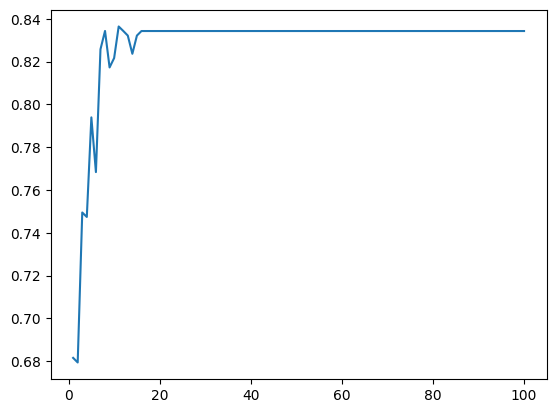

In [ ]:
param_dt_r = {'criterion': ['entropy'],
         'splitter': ['random'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt_r = GridSearchCV(dtc, param_dt_r, cv = 5, scoring = "accuracy")
%time gs_dt_r.fit(X_encoded, y01)
print(gs_dt_r.best_params_)
print(gs_dt_r.best_score_)

plt.plot(range(1, 101), gs_dt_r.cv_results_['mean_test_score'])


CPU times: user 3.09 s, sys: 10.6 ms, total: 3.1 s
Wall time: 3.13 s
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}
0.8363493840985443


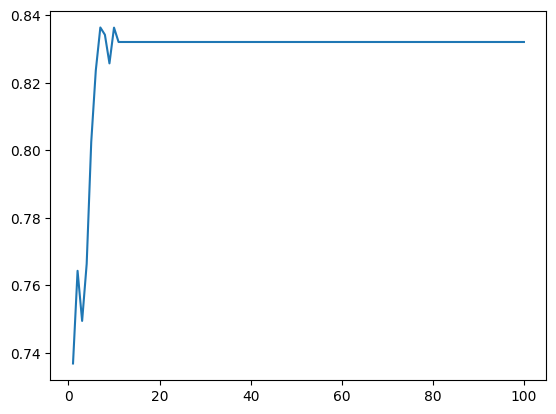

In [ ]:
param_dt_b = {'criterion': ['gini'],
         'splitter': ['best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt_b = GridSearchCV(dtc, param_dt_b, cv = 5, scoring = "accuracy")
%time gs_dt_b.fit(X_encoded, y01)
print(gs_dt_b.best_params_)
print(gs_dt_b.best_score_)

plt.plot(range(1, 101), gs_dt_b.cv_results_['mean_test_score'])


CPU times: user 3.13 s, sys: 6.69 ms, total: 3.14 s
Wall time: 3.17 s
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}
0.8575139977603584


Text(0.5, 1.0, 'Decision Tree')

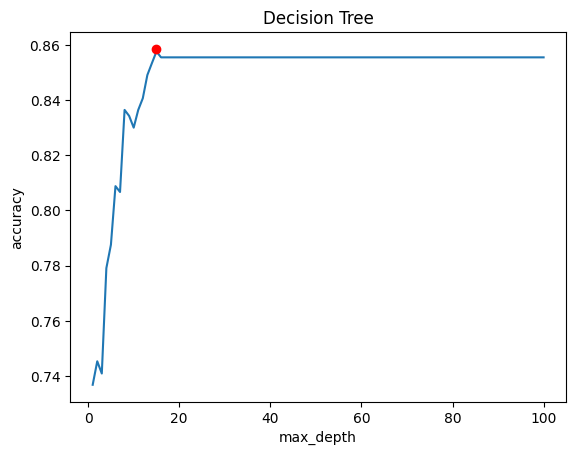

In [ ]:
param_dt_b = {'criterion': ['entropy'],
         'splitter': ['best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt_b = GridSearchCV(dtc, param_dt_b, cv = 5, scoring = "accuracy")
%time gs_dt_b.fit(X_encoded, y01)
print(gs_dt_b.best_params_)
print(gs_dt_b.best_score_)

plt.plot(range(1, 101), gs_dt_b.cv_results_['mean_test_score'])
plt.plot(15, 0.8585139977603584, 'ro')

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Decision Tree')



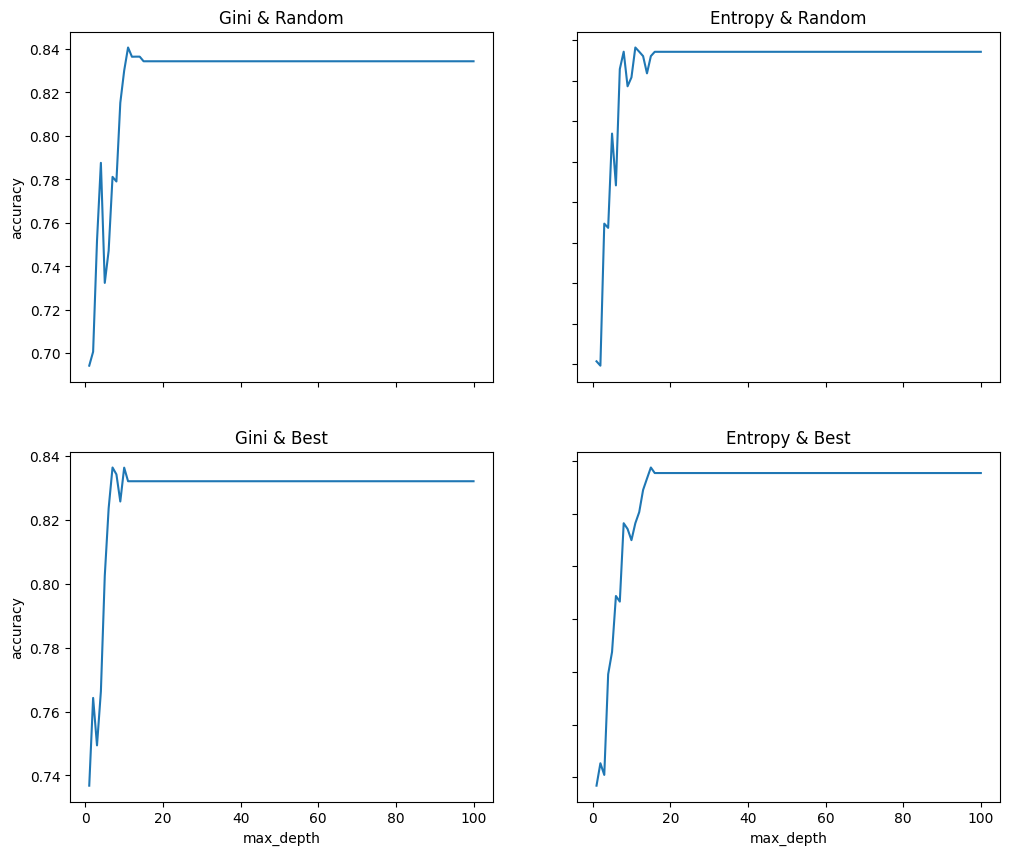

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0, 0].plot(range(1, 101), gs_dt_r.cv_results_['mean_test_score'][0:100])
axs[0, 0].set_title('Gini & Random')
axs[0, 1].plot(range(1, 101), gs_dt_r.cv_results_['mean_test_score'][100:200])
axs[0, 1].set_title('Entropy & Random')
axs[1, 0].plot(range(1, 101), gs_dt_b.cv_results_['mean_test_score'][0:100])
axs[1, 0].set_title('Gini & Best')
axs[1, 1].plot(range(1, 101), gs_dt_b.cv_results_['mean_test_score'][100:200])
axs[1, 1].set_title('Entropy & Best')

for ax in axs.flat:
    ax.set(xlabel='max_depth', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

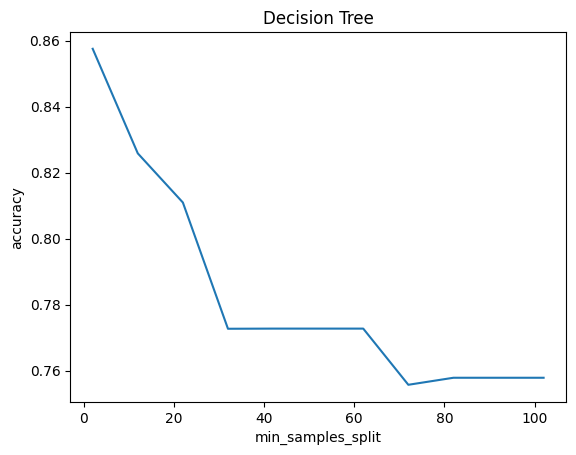

In [ ]:
param_dt = {'criterion': ['entropy'],
         'splitter': ['best'],
         'max_depth': [15],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': [1],
         'random_state': [80]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X_encoded, y01)
gs_dt.cv_results_

plt.plot(range(2, 103, 10), gs_dt.cv_results_['mean_test_score'])

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Decision Tree')

plt.show()

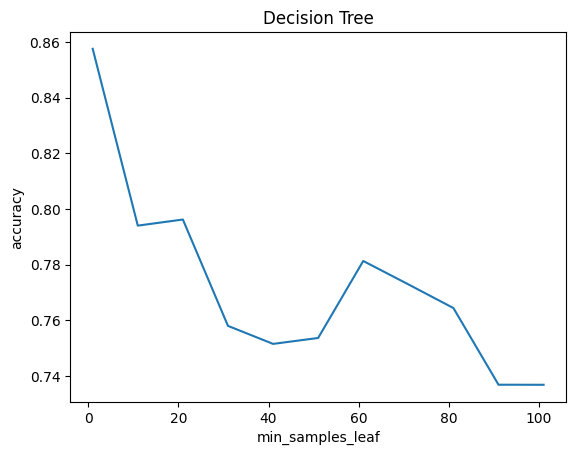

In [ ]:
param_dt = {'criterion': ['entropy'],
         'splitter': ['best'],
         'max_depth': [15],
         'min_samples_split': [2],
         'min_samples_leaf': range(1, 102, 10),
         'random_state': [80]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X_encoded, y01)
gs_dt.cv_results_

plt.plot(range(1, 102, 10), gs_dt.cv_results_['mean_test_score'])

plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('Decision Tree')

plt.show()

### Random Forest (RF)

In [ ]:
#help(rfc)

In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 21),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)
print(gs_rf.best_params_)
print(gs_rf.best_score_)


CPU times: user 6min 31s, sys: 1.39 s, total: 6min 32s
Wall time: 6min 35s
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


CPU times: user 6.48 s, sys: 28.9 ms, total: 6.5 s
Wall time: 6.51 s
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

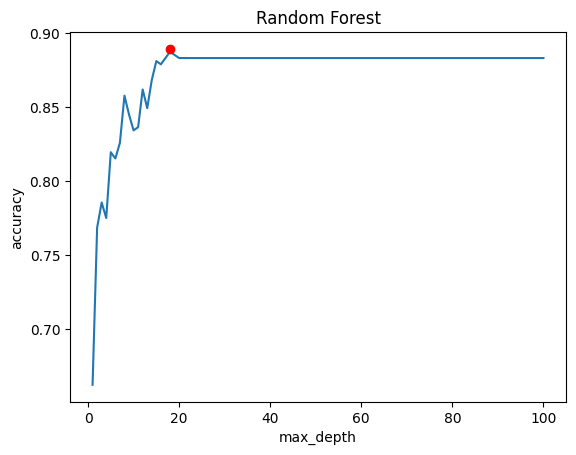

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(1, 101), gs_rf.cv_results_['mean_test_score'])
plt.plot(18, 0.8893460246360582, 'ro')


plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 1.23 s, sys: 8.94 ms, total: 1.24 s
Wall time: 1.26 s
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

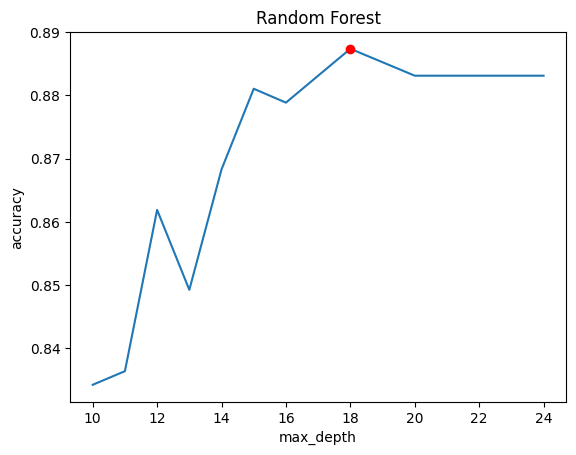

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': range(10, 25),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(10, 25), gs_rf.cv_results_['mean_test_score'])
plt.plot(18, 0.8873460246360582, 'ro')

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 10 s, sys: 44.9 ms, total: 10 s
Wall time: 10.1 s
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

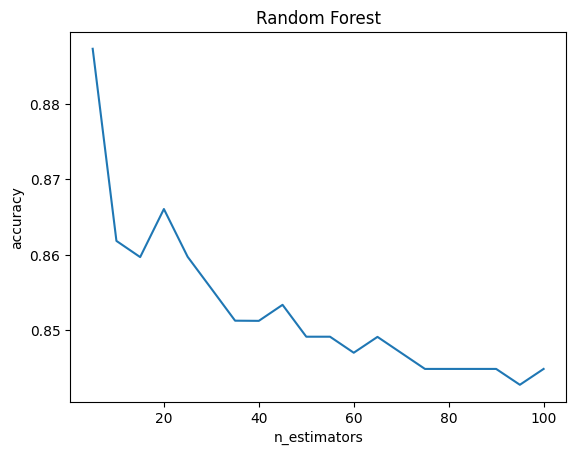

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [18],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(5, 101, 5), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 746 ms, sys: 5 ms, total: 751 ms
Wall time: 752 ms
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

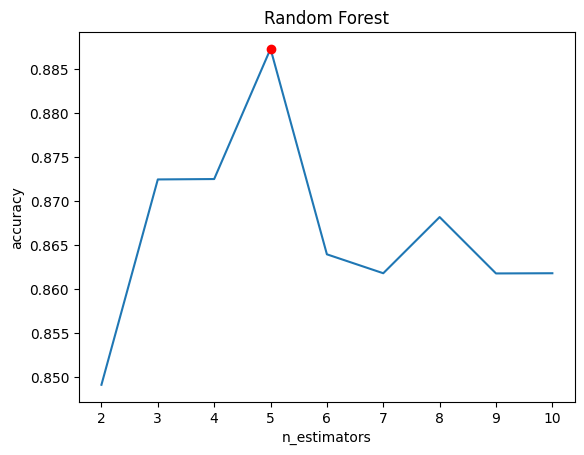

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [18],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(2, 11),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(2, 11), gs_rf.cv_results_['mean_test_score'])
plt.plot(5, 0.8873460246360582, 'ro')

plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 784 ms, sys: 2.99 ms, total: 786 ms
Wall time: 786 ms
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

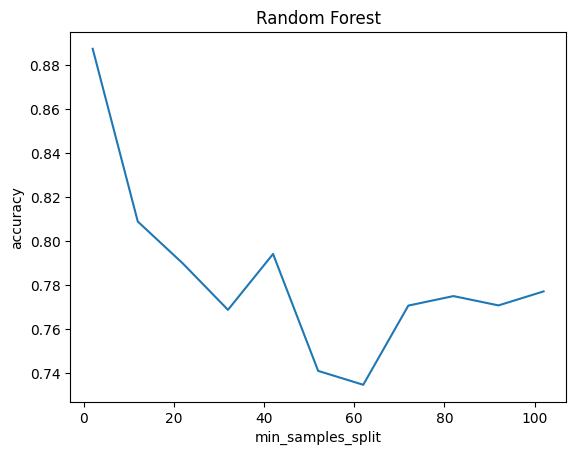

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [18],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(2, 103, 10), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 760 ms, sys: 7.98 ms, total: 768 ms
Wall time: 767 ms
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8873460246360582


Text(0.5, 1.0, 'Random Forest')

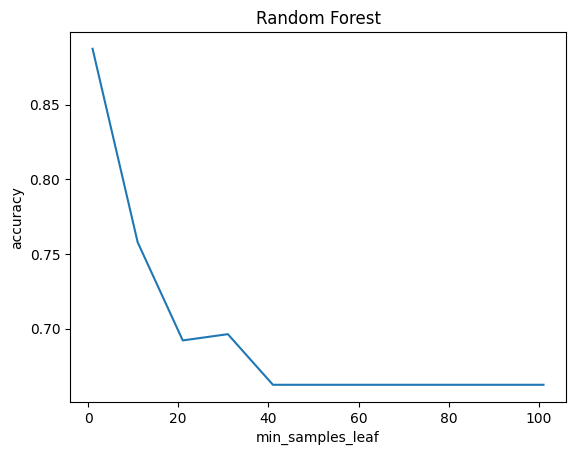

In [ ]:
param_rf = {'criterion': ['gini'],
         'max_depth': [18],
         'min_samples_split': [2],
         'min_samples_leaf': range(1, 103, 10),
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(1, 103, 10), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('Random Forest')



In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': [18],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)
print(gs_rf.cv_results_['mean_test_score'])
print(gs_rf.cv_results_['params'])


CPU times: user 158 ms, sys: 2 ms, total: 160 ms
Wall time: 161 ms
[0.88734602 0.85547592]
[{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}, {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}]


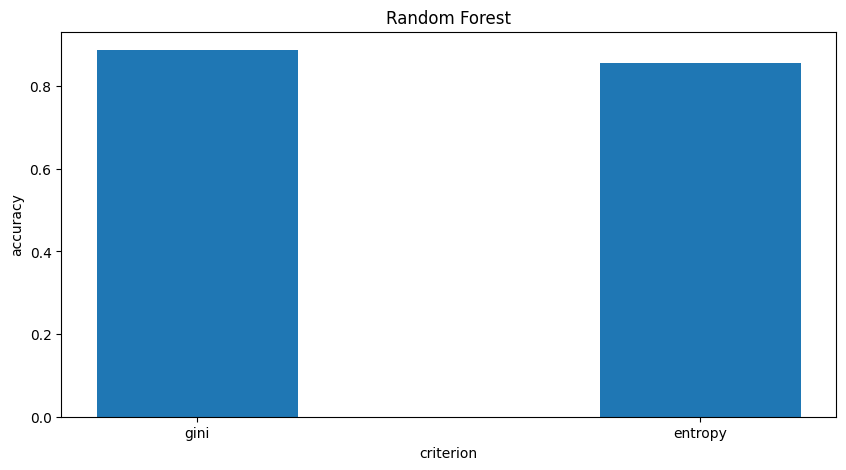

In [ ]:
rf_bar = {'gini':0.88734602 , 'entropy':0.85547592}
courses = list(rf_bar.keys())
values = list(rf_bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("criterion")
plt.ylabel("accuracy")
plt.title('Random Forest')
plt.show()

### Result

In [ ]:
print(gs_kn.best_score_)
print(gs_sv_l.best_score_)
print(gs_sv_r.best_score_)
#print(gs_sv_p.best_score_)
print(gs_lo.best_score_)
print(gs_dt.best_score_)
print(gs_rf.best_score_)

0.8724300111982084
0.8047256438969764
0.8321612541993281
0.7877043673012317
0.8575139977603584
0.8873460246360582


In [ ]:
print(gs_kn.best_params_)
print(gs_sv_l.best_params_)
print(gs_sv_r.best_params_)
#print(gs_sv_p.best_params_)
print(gs_lo.best_params_)
print(gs_dt.best_params_)
print(gs_rf.best_params_)

{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
{'C': 0.03125, 'kernel': 'linear'}
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
{'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 80, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}


## Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y01, test_size= 0.2)

In [ ]:
#initialize

knc = KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')
svc = SVC(C=1, gamma=0.5, kernel='rbf')
lor = LogisticRegression(C=0.25, penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2, random_state=80, splitter='best')
rfc = RandomForestClassifier(criterion='gini', max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=131)


In [ ]:
df['v01'].value_counts(sort = True)


,count
v01,
0,312
1,159


Text(0.5, 1.0, 'Percentage of Viability in Dataset')

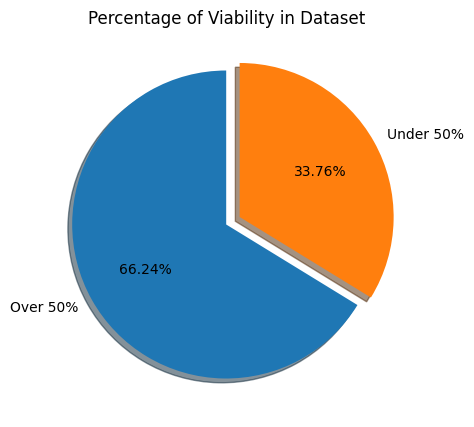

In [ ]:
# Data to plot
sizes = df['v01'].value_counts(sort = True)

rcParams['figure.figsize'] = 5,5 # Plot

plt.pie(sizes, explode = (0,0.1), labels=["Over 50%", "Under 50%"], autopct='%.2f%%', shadow=True, startangle=90)

plt.title('Percentage of Viability in Dataset')

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_knc = cross_val_score(knc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_knc.mean(), kf_knc.std())

0.8617693169092945 0.06214667020629334


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_svc = cross_val_score(svc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_svc.mean(), kf_svc.std())

0.8449496080627099 0.022248853179838407


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_lor = cross_val_score(lor, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_lor.mean(), kf_lor.std())

0.8323404255319149 0.032807379178547015


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_dtc = cross_val_score(dtc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_dtc.mean(), kf_dtc.std())

0.9001567749160134 0.024051978806148615


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_rfc = cross_val_score(rfc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_rfc.mean(), kf_rfc.std())

0.8811646136618142 0.046124624714515235


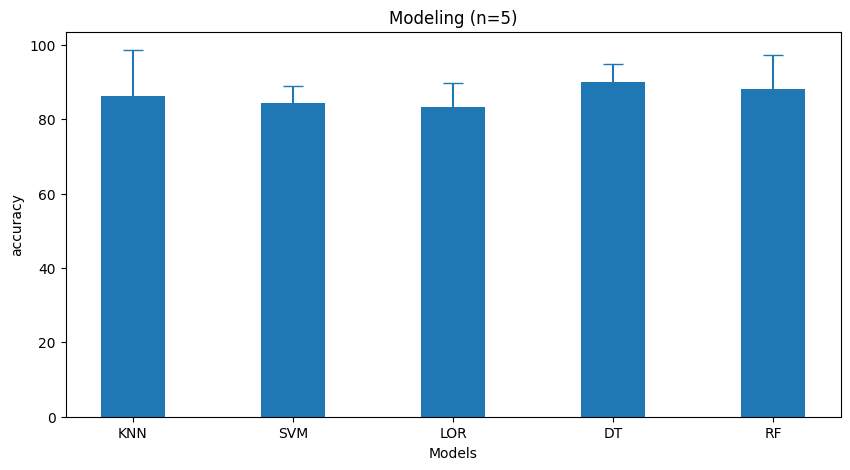

In [ ]:
#Visualize

bar = {'KNN':86.17693169092945  , 'SVM':84.49496080627099 , 'LOR':83.23404255319149  , 'DT':90.01567749160134 , 'RF':88.11646136618142  }
error = np.array([6.214667020629334, 2.2248853179838407, 3.2807379178547015, 2.4051978806148615, 4.6124624714515235])
courses = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)
plt.errorbar(courses, values, error*2, capsize=7, linestyle='None')

plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title('Modeling (n=5)')
plt.show()


In [ ]:
#fit

knc.fit(X_train, y_train)
svc.fit(X_train, y_train)
lor.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=5, random_state=131)

In [ ]:
# validation

knc_val = knc.predict(X_train)
svc_val = svc.predict(X_train)
lor_val = lor.predict(X_train)
dtc_val = dtc.predict(X_train)
rfc_val = rfc.predict(X_train)


In [ ]:
# predict

knc_pred = knc.predict(X_test)
svc_pred = svc.predict(X_test)
lor_pred = lor.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)


In [ ]:
# Evaluation

print("KNN (Train): ", accuracy_score(y_train, knc_val), "\t(Test): ", accuracy_score(y_test, knc_pred))
print("SVM (Train): ", accuracy_score(y_train, svc_val), "\t(Test): ", accuracy_score(y_test, svc_pred))
print("LoR (Train): ", accuracy_score(y_train, lor_val), "\t(Test): ", accuracy_score(y_test, lor_pred))
print("DT  (Train): ", accuracy_score(y_train, dtc_val), "\t(Test): ", accuracy_score(y_test, dtc_pred))
print("RF  (Train): ", accuracy_score(y_train, rfc_val), "\t(Test): ", accuracy_score(y_test, rfc_pred))


KNN (Train):  0.9813829787234043 	(Test):  0.8631578947368421
SVM (Train):  0.9547872340425532 	(Test):  0.8105263157894737
LoR (Train):  0.8537234042553191 	(Test):  0.8315789473684211
DT  (Train):  0.9813829787234043 	(Test):  0.9052631578947369
RF  (Train):  0.9680851063829787 	(Test):  0.8842105263157894


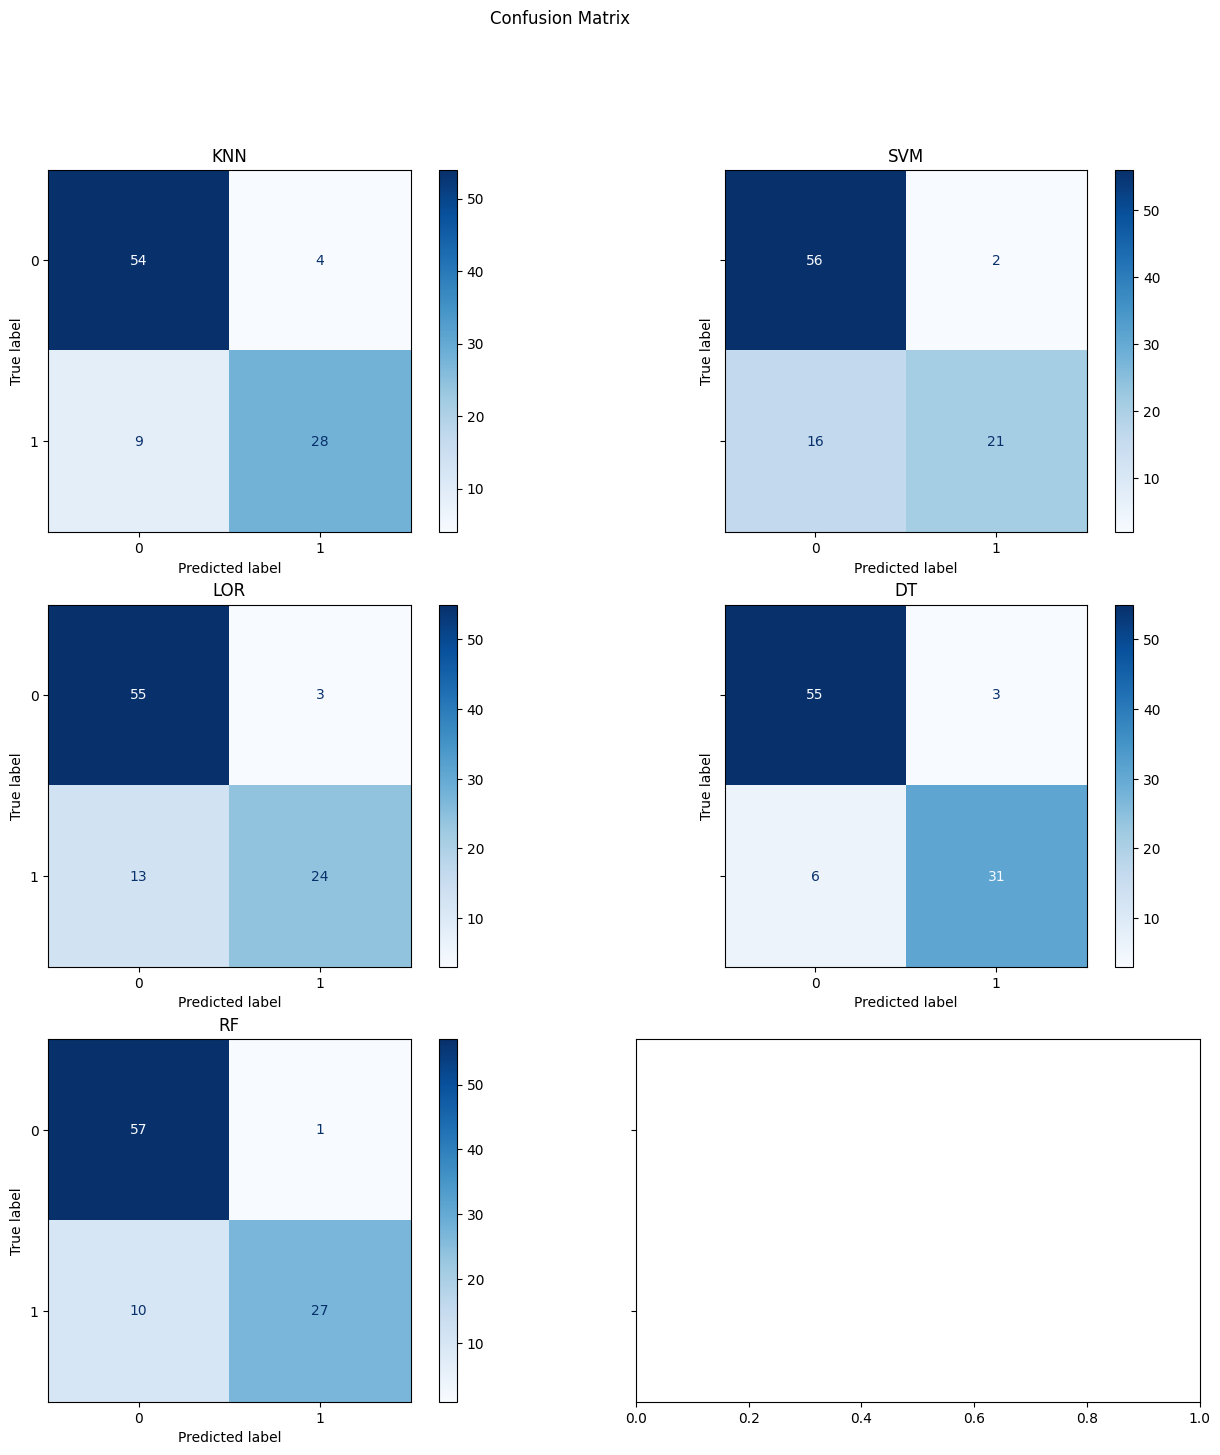

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16), sharey=True)
fig.suptitle('Confusion Matrix')

cm_knc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, knc_pred))
cm_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, svc_pred))
cm_lor = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, lor_pred))
cm_dtc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dtc_pred))
cm_rfc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rfc_pred))


axes[0, 0].set_title('KNN')
cm_knc.plot(cmap='Blues', ax=axes[0, 0])

axes[0, 1].set_title('SVM')
cm_svc.plot(cmap='Blues', ax=axes[0, 1])

axes[1, 0].set_title('LOR')
cm_lor.plot(cmap='Blues', ax=axes[1, 0])

axes[1, 1].set_title('DT')
cm_dtc.plot(cmap='Blues', ax=axes[1, 1])

axes[2, 0].set_title('RF')
cm_rfc.plot(cmap='Blues', ax=axes[2, 0])

plt.show()

In [ ]:
print(classification_report(y_test, knc_pred))
print(classification_report(y_test, svc_pred))
print(classification_report(y_test, lor_pred))
print(classification_report(y_test, dtc_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.88      0.76      0.81        37

    accuracy                           0.86        95
   macro avg       0.87      0.84      0.85        95
weighted avg       0.86      0.86      0.86        95

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        58
           1       0.91      0.57      0.70        37

    accuracy                           0.81        95
   macro avg       0.85      0.77      0.78        95
weighted avg       0.83      0.81      0.80        95

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        58
           1       0.89      0.65      0.75        37

    accuracy                           0.83        95
   macro avg       0.85      0.80      0.81        95
weighted avg       0.84      0.83      0.83        95

              preci

برای زنده مانی 50 به بالا نیاز به چه دوزی داریم؟


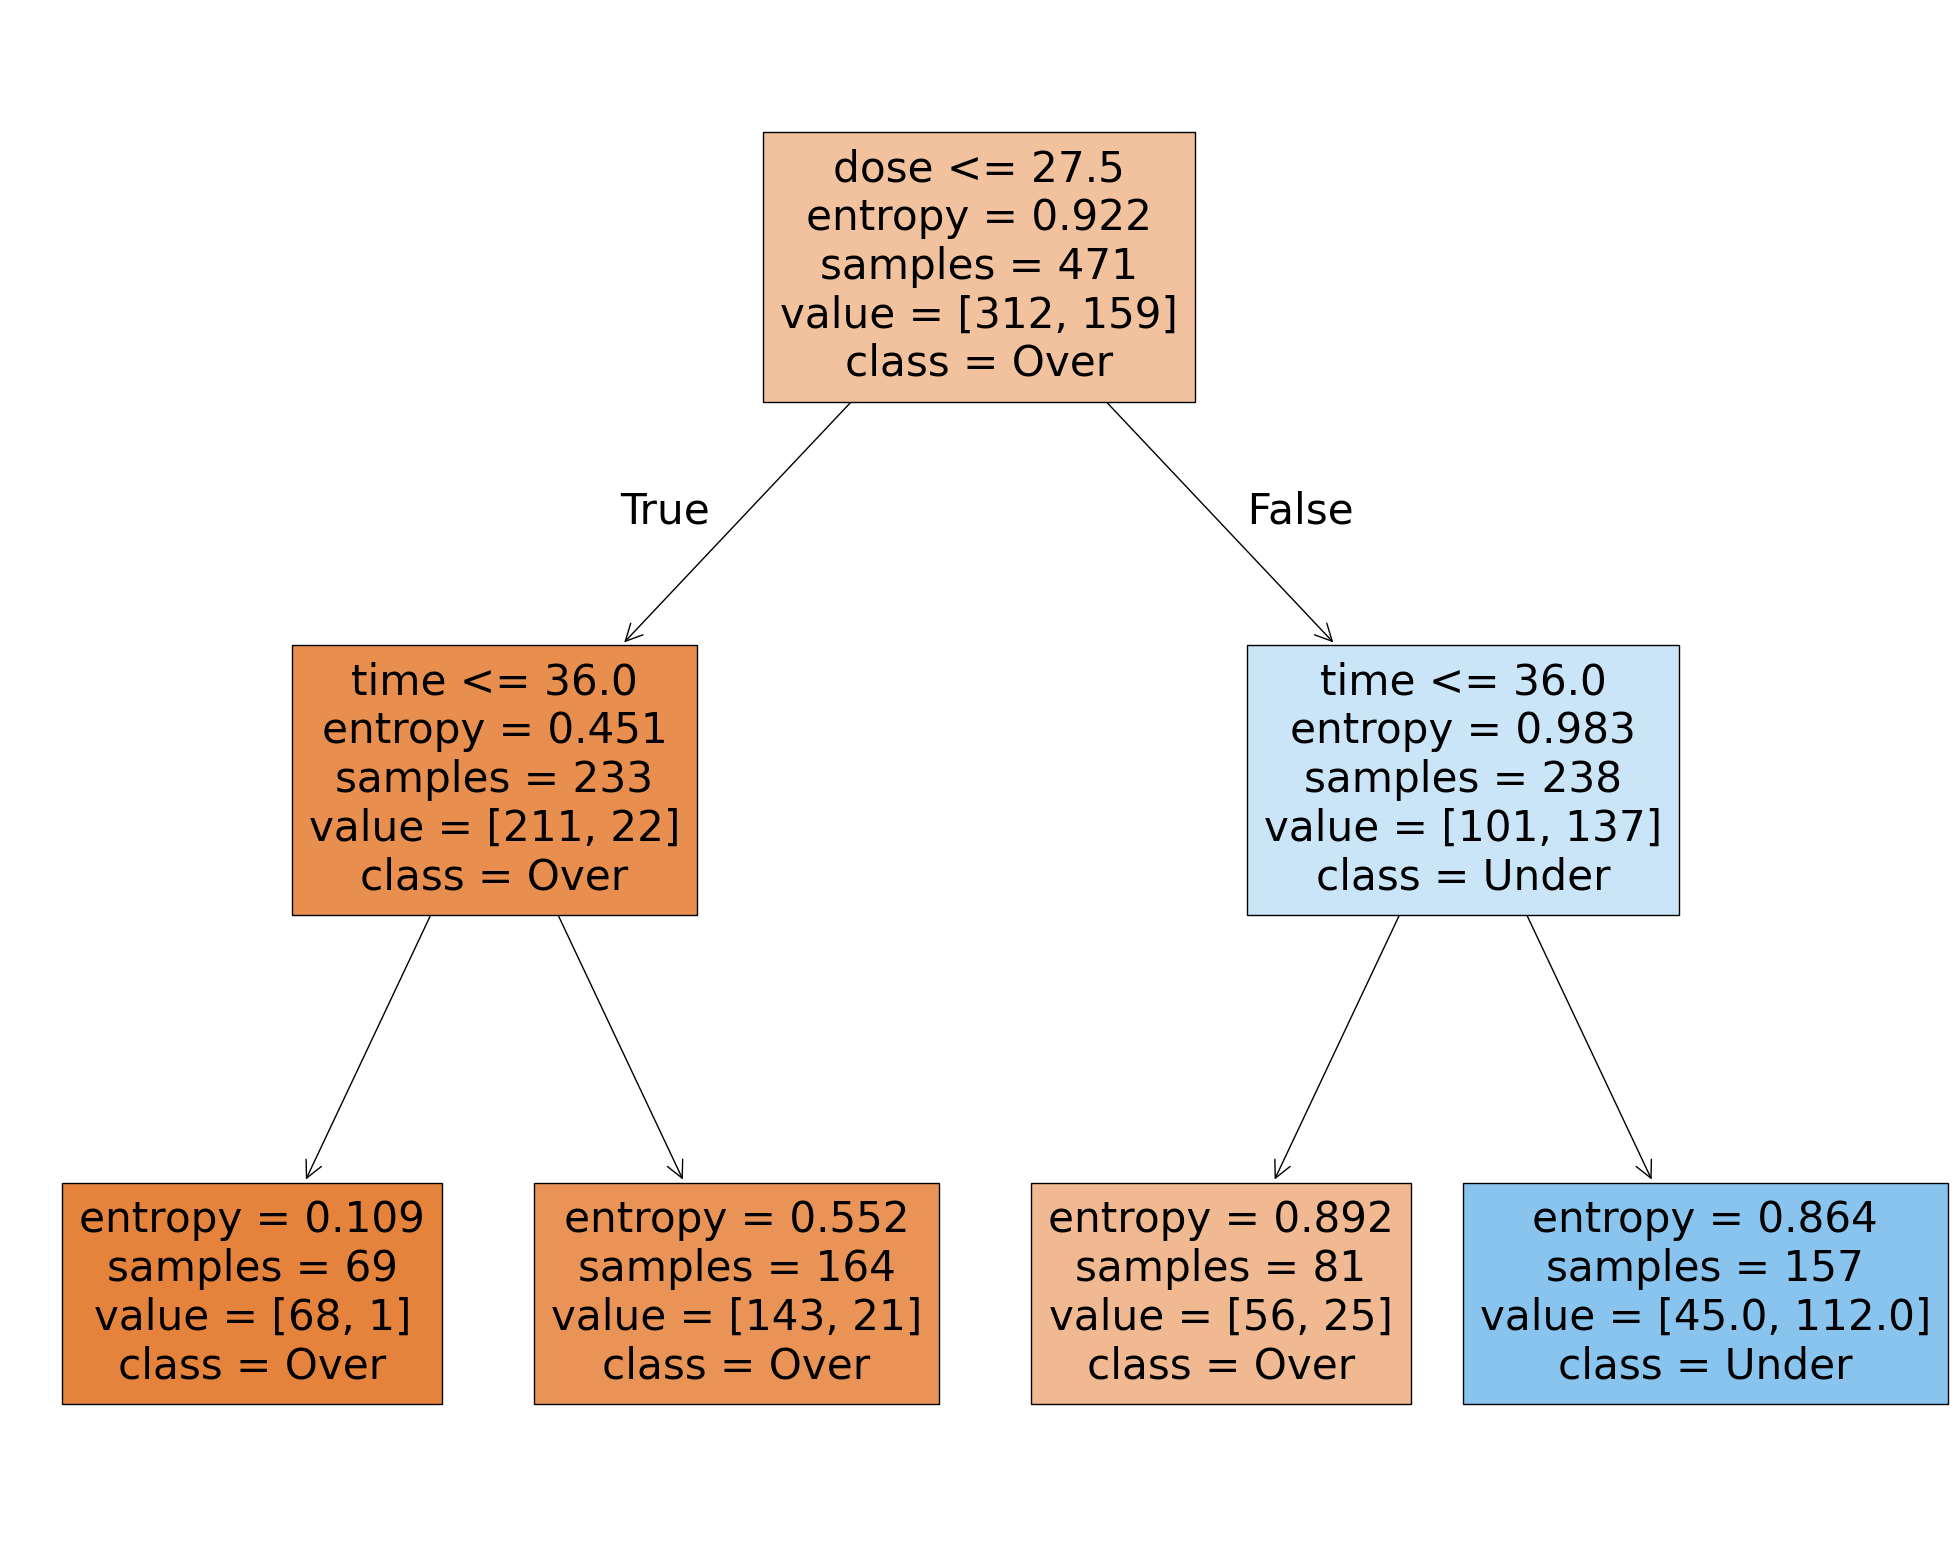

In [ ]:
#Final Model

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y01, test_size= 0.2)

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=80, splitter='best')
dtc.fit(X, y01)
dtc_pred = dtc.predict(X)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=['time', 'dose'], class_names=['Over', 'Under'], filled=True)

In [ ]:
accuracy_score(y01, dtc_pred)

0.8046709129511678